# Ocorrências Aeronáuticas na Aviação Civil Brasileira

<font color='blue'><b>Docker image:</b> docker pull jupyter/scipy-notebook:4b07fcdcb67e</font>

__Fonte de dados:__ http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

__Resumo sobre os dados:__ _"A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA nos últimos 10 anos e que ocorreram em solo brasileiro. Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG)..."_

## 1 - Problema proposto

O problema proposto é análise das ocorrências aéreas em todo território nacional nos últimos anos.

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import requests
!pip install folium
import folium
from folium import plugins
!pip install pykml
from pykml import parser

# mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 2 - Coleta de Dados

### Tabela: OCORRÊNCIA

In [2]:
# -----------------------------------------------------------------------------------------------------------
# Descomentar o trecho abaixo para baixar uma nova versão do arquivo
# -----------------------------------------------------------------------------------------------------------
# dataset_ocorrencia = 'http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv'
# df_ocorrencia = pd.read_csv(dataset_ocorrencia, header=0, sep=None, engine='python', encoding='ISO-8859-1')
# df_ocorrencia.to_csv('datasets/ocorrencia_cenipa.csv', index=False)
# -----------------------------------------------------------------------------------------------------------

# comente a linha abaixo caso não queira carregar o arquivo salvo no disco
df_ocorrencia = pd.read_csv('datasets/ocorrencia_cenipa.csv', header=0, sep=None, engine='python', encoding='UTF-8')

df_ocorrencia.head(10)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,39115,39115,39115,39115,39115,ACIDENTE,-13.3805555556,-44.6172222222,CORRENTINA,BA,BRASIL,SNTY,07/02/2010,17:40:00,SIM,FINALIZADA,A-031/CENIPA/2011,SIM,2011-07-21,2,1,NÃO
1,39155,39155,39155,39155,39155,INCIDENTE,***,***,BELO HORIZONTE,MG,BRASIL,****,05/02/2010,12:55:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,39156,39156,39156,39156,39156,INCIDENTE GRAVE,-15.2402777778,-59.3541666667,CASCAVEL,PR,BRASIL,SBCA,10/01/2010,23:15:00,SIM,FINALIZADA,I-004/CENIPA/2011,SIM,2011-06-30,2,1,NÃO
3,39158,39158,39158,39158,39158,INCIDENTE,***,***,BELÉM,PA,BRASIL,****,28/01/2010,16:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
4,39176,39176,39176,39176,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,BRASIL,****,05/02/2010,09:30:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
5,39178,39178,39178,39178,39178,INCIDENTE,NaN,NaN,CAMPINAS,SP,BRASIL,****,08/02/2010,12:33:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6,39235,39235,39235,39235,39235,ACIDENTE,-18.0583333333,-50.1458333333,ITUMBIARA,GO,BRASIL,****,06/02/2010,17:20:00,SIM,FINALIZADA,A-067/CENIPA/2011,SIM,2011-08-29,3,1,NÃO
7,39275,39275,39275,39275,39275,ACIDENTE,-23.5758333333,-46.7022222222,SÃO PAULO,SP,BRASIL,****,10/02/2010,09:03:00,SIM,FINALIZADA,A-009/CENIPA/2014,SIM,2016-04-22,3,1,NÃO
8,39295,39295,39295,39295,39295,ACIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,****,06/02/2010,21:09:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO
9,39315,39315,39315,39315,39315,ACIDENTE,-6.615,-64.1116666667,CANUTAMA,AM,BRASIL,****,15/01/2010,21:22:00,***,FINALIZADA,A-519/CENIPA/2016,SIM,2017-02-08,0,1,NÃO


### Tabela: AERONAVE

In [3]:
# -----------------------------------------------------------------------------------------------------------
# Descomentar o trecho abaixo para baixar uma nova versão do arquivo
# -----------------------------------------------------------------------------------------------------------
# dataset_aeronaves = 'http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv'
# df_aeronaves = pd.read_csv(dataset_aeronaves, header=0, sep=None, engine='python', encoding='ISO-8859-1')
# df_aeronaves.to_csv('datasets/aeronaves_cenipa.csv', index=False)
# -----------------------------------------------------------------------------------------------------------

# comente a linha abaixo caso não queira carregar o arquivo salvo no disco
df_aeronaves = pd.read_csv('datasets/aeronaves_cenipa.csv', header=0, sep=None, engine='python', encoding='UTF-8')

df_aeronaves.head(10)

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,108862,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
5,39178,PTMZU,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
6,39235,PTWKN,***,AVIÃO,CESSNA AIRCRAFT,A188B,C188,PISTÃO,MONOMOTOR,1497,1497,1.0,1976.0,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,DESTRUÍDA,1
7,39275,PTYRE,***,HELICÓPTERO,EUROCOPTER FRANCE,AS 350 BA,***,TURBOEIXO,MONOMOTOR,2100,2100,6.0,1994.0,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE,CAMPO DE MARTE,CRUZEIRO,PRIVADA,DESTRUÍDA,1
8,39295,PUFLK,EXPERIMENTAL,ULTRALEVE,***,RV-9,ULAC,PISTÃO,MONOMOTOR,735,735,2.0,2004.0,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,APROXIMAÇÃO FINAL,EXPERIMENTAL,SUBSTANCIAL,2
9,39315,PTHLE,***,HELICÓPTERO,HELIBRAS,HB-350B,AS50,TURBOEIXO,MONOMOTOR,1950,1950,6.0,1981.0,BRASIL,BRASIL,HELICÓPTERO,TÁXI AÉREO,FORA DE AERODROMO,LÁBREA,CRUZEIRO,TÁXI AÉREO,***,2


### Tabela: OCORRÊNCIA_TIPO

In [4]:
# -----------------------------------------------------------------------------------------------------------
# Descomentar o trecho abaixo para baixar uma nova versão do arquivo
# -----------------------------------------------------------------------------------------------------------
# dataset_ocorrencia_tipo = 'http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv'
# df_ocorrencia_tipo = pd.read_csv(dataset_ocorrencia_tipo, header=0, sep=None, engine='python', encoding='ISO-8859-1')
# df_ocorrencia_tipo.to_csv('datasets/ocorrencia_tipo_cenipa.csv', index=False)
# -----------------------------------------------------------------------------------------------------------

# comente a linha abaixo caso não queira carregar o arquivo salvo no disco
df_ocorrencia_tipo = pd.read_csv('datasets/ocorrencia_tipo_cenipa.csv', header=0, sep=None, engine='python', encoding='UTF-8')

df_ocorrencia_tipo.head(10)

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
1,39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
5,39178,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
6,39235,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I
7,39275,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
8,39295,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I
9,39315,OUTROS,OUTROS,OTHR


## 3 - Processamento/Tratamento de Dados

### Agrupamento dos datasets em um único dataset

Inner join produz como output um dataframe somente das linhas que satisfazem a condição em ambas linhas dos dataframes comparados

In [5]:
df_join1 = pd.merge(df_ocorrencia, df_aeronaves, on ='codigo_ocorrencia2', how ='inner')
df_join1.head(10)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,39115,39115,39115,39115,ACIDENTE,-13.3805555556,-44.6172222222,CORRENTINA,BA,BRASIL,SNTY,07/02/2010,17:40:00,SIM,FINALIZADA,A-031/CENIPA/2011,SIM,2011-07-21,2,1,NÃO,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,39155,39155,39155,39155,INCIDENTE,***,***,BELO HORIZONTE,MG,BRASIL,****,05/02/2010,12:55:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,39156,39156,39156,39156,INCIDENTE GRAVE,-15.2402777778,-59.3541666667,CASCAVEL,PR,BRASIL,SBCA,10/01/2010,23:15:00,SIM,FINALIZADA,I-004/CENIPA/2011,SIM,2011-06-30,2,1,NÃO,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,39158,39158,39158,39158,INCIDENTE,***,***,BELÉM,PA,BRASIL,****,28/01/2010,16:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,108862,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,39176,39176,39176,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,BRASIL,****,05/02/2010,09:30:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
5,39178,39178,39178,39178,39178,INCIDENTE,NaN,NaN,CAMPINAS,SP,BRASIL,****,08/02/2010,12:33:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,PTMZU,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
6,39235,39235,39235,39235,39235,ACIDENTE,-18.0583333333,-50.1458333333,ITUMBIARA,GO,BRASIL,****,06/02/2010,17:20:00,SIM,FINALIZADA,A-067/CENIPA/2011,SIM,2011-08-29,3,1,NÃO,PTWKN,***,AVIÃO,CESSNA AIRCRAFT,A188B,C188,PISTÃO,MONOMOTOR,1497,1497,1.0,1976.0,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,DESTRUÍDA,1
7,39275,39275,39275,39275,39275,ACIDENTE,-23.5758333333,-46.7022222222,SÃO PAULO,SP,BRASIL,****,10/02/2010,09:03:00,SIM,FINALIZADA,A-009/CENIPA/2014,SIM,2016-04-22,3,1,NÃO,PTYRE,***,HELICÓPTERO,EUROCOPTER FRANCE,AS 350 BA,***,TURBOEIXO,MONOMOTOR,2100,2100,6.0,1994.0,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE,CAMPO DE MARTE,CRUZEIRO,PRIVADA,DESTRUÍDA,1
8,39295,39295,39295,39295,39295,ACIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,****,06/02/2010,21:09:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO,PUFLK,EXPERIMENTAL,ULTRALEVE,***,RV-9,ULAC,PISTÃO,MONOMOTOR,735,735,2.0,2004.0,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,APROXIMAÇÃO FINAL,EXPERIMENTAL,SUBSTANCIAL,2
9,39315,39315,39315,39315,39315,ACIDENTE,-6.61

In [6]:
df_join2 = pd.merge(df_join1, df_ocorrencia_tipo, on ='codigo_ocorrencia1', how ='inner')
df_join2.head(10)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,39115,39115,39115,39115,ACIDENTE,-13.3805555556,-44.6172222222,CORRENTINA,BA,BRASIL,SNTY,07/02/2010,17:40:00,SIM,FINALIZADA,A-031/CENIPA/2011,SIM,2011-07-21,2,1,NÃO,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
1,39155,39155,39155,39155,39155,INCIDENTE,***,***,BELO HORIZONTE,MG,BRASIL,****,05/02/2010,12:55:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,39156,39156,39156,39156,INCIDENTE GRAVE,-15.2402777778,-59.3541666667,CASCAVEL,PR,BRASIL,SBCA,10/01/2010,23:15:00,SIM,FINALIZADA,I-004/CENIPA/2011,SIM,2011-06-30,2,1,NÃO,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,39158,39158,39158,39158,INCIDENTE,***,***,BELÉM,PA,BRASIL,****,28/01/2010,16:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,108862,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,39176,39176,39176,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,BRASIL,****,05/02/2010,09:30:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
5,39178,39178,39178,39178,39178,INCIDENTE,NaN,NaN,CAMPINAS,SP,BRASIL,****,08/02/2010,12:33:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,PTMZU,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
6,39235,39235,39235,39235,39235,ACIDENTE,-18.0583333333,-50.1458333333,ITUMBIARA,GO,BRASIL,****,06/02/2010,17:20:00,SIM,FINALIZADA,A-067/CENIPA/2011,SIM,2011-08-29,3,1,NÃO,PTWKN,***,AVIÃO,CESSNA AIRCRAFT,A188B,C188,PISTÃO,MONOMOTOR,1497,1497,1.0,1976.0,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,DESTRUÍDA,1,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I
7,39275,39275,39275,39275,39275,ACIDENTE,-23.5758333333,-46.7022222222,SÃO PAULO,SP,BRASIL,****,10/02/2010,09:03:00,SIM,FINALIZADA,A-009/CENIPA/2014,

### Exclusão de colunas

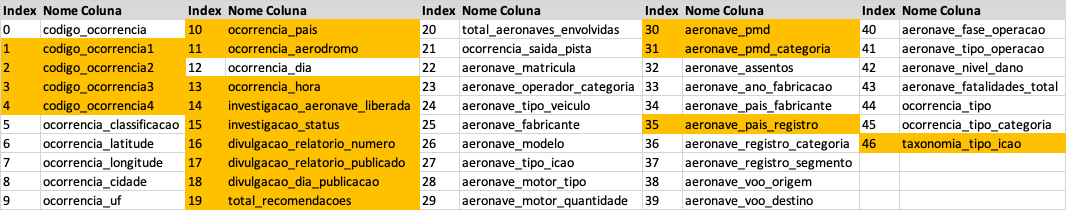

In [7]:
ocorrencia_pais = df_join2['ocorrencia_pais'].unique()
ocorrencia_pais

array(['BRASIL'], dtype=object)

In [8]:
aeronave_pais_registro = df_join2['aeronave_pais_registro'].unique()
aeronave_pais_registro

array(['BRASIL', 'ESTADOS UNIDOS', 'PARAGUAI', 'BOLÍVIA', 'PANAMÁ',
       'PORTUGAL', 'ESPANHA', 'ÁFRICA DO SUL', 'CHILE', 'SUIÇA',
       'ALEMANHA', 'COLÔMBIA', 'URUGUAI', 'CINGAPURA', 'FRANÇA', 'RÚSSIA',
       'POLÔNIA', 'EMIRADOS ÁRABES', 'ITÁLIA', 'VENEZUELA', 'ARGENTINA',
       'NÃO IDENTIFICADO'], dtype=object)

In [9]:
df_clean = df_join2.drop(df_join2.columns[[1,2,3,4,10,11,13,14,15,16,17,18,19,30,31,35,46]], axis=1)
df_clean.reset_index()
df_clean.head(5)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria
0,39115,ACIDENTE,-13.3805555556,-44.6172222222,CORRENTINA,BA,07/02/2010,1,NÃO,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979.0,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,PANE SECA,COMBUSTÍVEL | PANE SECA
1,39155,INCIDENTE,***,***,BELO HORIZONTE,MG,05/02/2010,1,NÃO,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,8.0,1979.0,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
2,39156,INCIDENTE GRAVE,-15.2402777778,-59.3541666667,CASCAVEL,PR,10/01/2010,1,NÃO,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,73.0,2008.0,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO
3,39158,INCIDENTE,***,***,BELÉM,PA,28/01/2010,1,NÃO,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,5.0,1984.0,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...
4,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,05/02/2010,1,NÃO,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,184.0,2001.0,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...


### Dados faltantes

Nesta etapa, é necessário verificar se todas as colunas do dataset possuem valo-res válidos, não nulos. No entanto visualmente nota-se que o padrão da base de dados para indicar um registro faltante não é apena um valor nulo mas também, três asteriscos [***]  Antes de prosseguir analisando coluna por coluna na busca de dados faltantes, vamos então substituir os asteriscos triplos por np.nan para podermos utilizar o metódo .isnull e descobrir quantos dados nulos há no dataset

In [10]:
df_clean = df_clean.replace('***', np.nan)
df_clean.head(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria
0,39115,ACIDENTE,-13.3805555556,-44.6172222222,CORRENTINA,BA,07/02/2010,1,NÃO,PTNQX,NaN,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979.0,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,PANE SECA,COMBUSTÍVEL | PANE SECA
1,39155,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,05/02/2010,1,NÃO,PTLVI,NaN,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,8.0,1979.0,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
2,39156,INCIDENTE GRAVE,-15.2402777778,-59.3541666667,CASCAVEL,PR,10/01/2010,1,NÃO,PPPTO,NaN,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,73.0,2008.0,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO
3,39158,INCIDENTE,NaN,NaN,BELÉM,PA,28/01/2010,1,NÃO,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,5.0,1984.0,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...
4,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,05/02/2010,1,NÃO,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,184.0,2001.0,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
5,39178,INCIDENTE,NaN,NaN,CAMPINAS,SP,08/02/2010,1,NÃO,PTMZU,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,184.0,2001.0,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
6,39235,ACIDENTE,-18.0583333333,-50.1458333333,ITUMBIARA,GO,06/02/2010,1,NÃO,PTWKN,NaN,AVIÃO,CESSNA AIRCRAFT,A188B,C188,PISTÃO,MONOMOTOR,1.0,1976.0,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,DESTRUÍDA,1,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO
7,39275,ACIDENTE,-23.5758333333,-46.7022222222,SÃO PAULO,SP,10/02/2010,1,NÃO,PTYRE,NaN,HELICÓPTERO,EUROCOPTER FRANCE,AS 350 BA,NaN,TURBOEIXO,MONOMOTOR,6.0,1994.0,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE,CAMPO DE MARTE,CRUZEIRO,PRIVADA,DESTRUÍDA,1,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
8,39295,ACIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,06/02/2010,1,NÃO,PUFLK,EXPERIMENTAL,ULTRALEVE,NaN,RV-9,ULAC,PISTÃO,MONOMOTOR,2.0,2004.0,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,APROXIMAÇÃO FINAL,EXPERIMENTAL,SUBSTANCIAL,2,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO
9,39315,ACIDENTE,-6.615,-64.1116666667,CANUTAMA,AM,15/01/2010,1,NÃO,PTHLE,NaN,HELICÓPTERO,HELIBRAS,HB-350B,AS50,TURBOEIXO,MONOMOTOR,6.0,1981.0,BRASIL,HELICÓPTERO,TÁXI AÉREO,FORA DE AERODROMO,LÁBREA,CRUZEIRO,TÁXI AÉREO,NaN,2,OUTROS,OUTROS


Agora vamos analisar todo o dataset e verificar se existem valores nulos:

In [11]:
print('Há valores nulos ocorrencia_classificacao...:', df_clean['ocorrencia_classificacao'].isnull().values.any())
print('Há valores nulos ocorrencia_latitude........:', df_clean['ocorrencia_latitude'].isnull().values.any())
print('Há valores nulos ocorrencia_longitude.......:', df_clean['ocorrencia_longitude'].isnull().values.any())
print('Há valores nulos ocorrencia_cidade..........:', df_clean['ocorrencia_cidade'].isnull().values.any())
print('Há valores nulos ocorrencia_dia.............:', df_clean['ocorrencia_dia'].isnull().values.any())
print('Há valores nulos ocorrencia_uf..............:', df_clean['ocorrencia_uf'].isnull().values.any())
print('Há valores nulos total_aeronaves_envolvidas.:', df_clean['total_aeronaves_envolvidas'].isnull().values.any())
print('Há valores nulos ocorrencia_saida_pista.....:', df_clean['ocorrencia_saida_pista'].isnull().values.any())
print('Há valores nulos aeronave_matricula.........:', df_clean['aeronave_matricula'].isnull().values.any())
print('Há valores nulos aeronave_operador_categoria:', df_clean['aeronave_operador_categoria'].isnull().values.any())
print('Há valores nulos aeronave_tipo_veiculo......:', df_clean['aeronave_tipo_veiculo'].isnull().values.any())
print('Há valores nulos aeronave_fabricante........:', df_clean['aeronave_fabricante'].isnull().values.any())
print('Há valores nulos aeronave_modelo............:', df_clean['aeronave_modelo'].isnull().values.any())
print('Há valores nulos aeronave_tipo_icao.........:', df_clean['aeronave_tipo_icao'].isnull().values.any())
print('Há valores nulos aeronave_motor_tipo........:', df_clean['aeronave_motor_tipo'].isnull().values.any())
print('Há valores nulos aeronave_motor_quantidade..:', df_clean['aeronave_motor_quantidade'].isnull().values.any())
print('Há valores nulos aeronave_assentos..........:', df_clean['aeronave_assentos'].isnull().values.any())
print('Há valores nulos aeronave_ano_fabricacao....:', df_clean['aeronave_ano_fabricacao'].isnull().values.any())
print('Há valores nulos aeronave_pais_fabricante...:', df_clean['aeronave_pais_fabricante'].isnull().values.any())
print('Há valores nulos aeronave_registro_categoria:', df_clean['aeronave_registro_categoria'].isnull().values.any())
print('Há valores nulos aeronave_registro_segmento.:', df_clean['aeronave_registro_segmento'].isnull().values.any())
print('Há valores nulos aeronave_voo_origem........:', df_clean['aeronave_voo_origem'].isnull().values.any())
print('Há valores nulos aeronave_voo_destino.......:', df_clean['aeronave_voo_destino'].isnull().values.any())
print('Há valores nulos aeronave_fase_operacao.....:', df_clean['aeronave_fase_operacao'].isnull().values.any())
print('Há valores nulos aeronave_tipo_operacao.....:', df_clean['aeronave_tipo_operacao'].isnull().values.any())
print('Há valores nulos aeronave_nivel_dano........:', df_clean['aeronave_nivel_dano'].isnull().values.any())
print('Há valores nulos aeronave_fatalidades_total.:', df_clean['aeronave_fatalidades_total'].isnull().values.any())
print('Há valores nulos ocorrencia_tipo............:', df_clean['ocorrencia_tipo'].isnull().values.any())
print('Há valores nulos ocorrencia_tipo_categoria..:', df_clean['ocorrencia_tipo_categoria'].isnull().values.any())

Há valores nulos ocorrencia_classificacao...: False
Há valores nulos ocorrencia_latitude........: True
Há valores nulos ocorrencia_longitude.......: True
Há valores nulos ocorrencia_cidade..........: False
Há valores nulos ocorrencia_dia.............: False
Há valores nulos ocorrencia_uf..............: True
Há valores nulos total_aeronaves_envolvidas.: False
Há valores nulos ocorrencia_saida_pista.....: False
Há valores nulos aeronave_matricula.........: False
Há valores nulos aeronave_operador_categoria: True
Há valores nulos aeronave_tipo_veiculo......: True
Há valores nulos aeronave_fabricante........: True
Há valores nulos aeronave_modelo............: True
Há valores nulos aeronave_tipo_icao.........: True
Há valores nulos aeronave_motor_tipo........: True
Há valores nulos aeronave_motor_quantidade..: True
Há valores nulos aeronave_assentos..........: True
Há valores nulos aeronave_ano_fabricacao....: True
Há valores nulos aeronave_pais_fabricante...: False
Há valores nulos aeronav

Vamos analisar a quantidade de valores nulos para cada coluna:

In [12]:
print('Qtd registros nulos ocorrencia_latitude........: ', len(df_clean.query('ocorrencia_latitude != ocorrencia_latitude').index))
print('Qtd registros nulos ocorrencia_longitude.......: ', len(df_clean.query('ocorrencia_longitude != ocorrencia_longitude').index))
print('Qtd registros nulos ocorrencia_uf..............: ', len(df_clean.query('ocorrencia_uf != ocorrencia_uf').index))
print('Qtd registros nulos aeronave_operador_categoria: ', len(df_clean.query('aeronave_operador_categoria != aeronave_operador_categoria').index))
print('Qtd registros nulos aeronave_tipo_veiculo......: ', len(df_clean.query('aeronave_tipo_veiculo != aeronave_tipo_veiculo').index))
print('Qtd registros nulos aeronave_fabricante........: ', len(df_clean.query('aeronave_fabricante != aeronave_fabricante').index))
print('Qtd registros nulos aeronave_modelo............: ', len(df_clean.query('aeronave_modelo != aeronave_modelo').index))
print('Qtd registros nulos aeronave_tipo_icao.........: ', len(df_clean.query('aeronave_tipo_icao != aeronave_tipo_icao').index))
print('Qtd registros nulos aeronave_motor_tipo........: ', len(df_clean.query('aeronave_motor_tipo != aeronave_motor_tipo').index))
print('Qtd registros nulos aeronave_motor_quantidade..: ', len(df_clean.query('aeronave_motor_quantidade != aeronave_motor_quantidade').index))
print('Qtd registros nulos aeronave_assentos..........: ', len(df_clean.query('aeronave_assentos != aeronave_assentos').index))
print('Qtd registros nulos aeronave_ano_fabricacao....: ', len(df_clean.query('aeronave_ano_fabricacao != aeronave_ano_fabricacao').index))
print('Qtd registros nulos aeronave_registro_categoria: ', len(df_clean.query('aeronave_registro_categoria != aeronave_registro_categoria').index))
print('Qtd registros nulos aeronave_registro_segmento.: ', len(df_clean.query('aeronave_registro_segmento != aeronave_registro_segmento').index))
print('Qtd registros nulos aeronave_voo_origem........: ', len(df_clean.query('aeronave_voo_origem != aeronave_voo_origem').index))
print('Qtd registros nulos aeronave_voo_destino.......: ', len(df_clean.query('aeronave_voo_destino != aeronave_voo_destino').index))
print('Qtd registros nulos aeronave_fase_operacao.....: ', len(df_clean.query('aeronave_fase_operacao != aeronave_fase_operacao').index))
print('Qtd registros nulos aeronave_tipo_operacao.....: ', len(df_clean.query('aeronave_tipo_operacao != aeronave_tipo_operacao').index))
print('Qtd registros nulos aeronave_nivel_dano........: ', len(df_clean.query('aeronave_nivel_dano != aeronave_nivel_dano').index))

Qtd registros nulos ocorrencia_latitude........:  2445
Qtd registros nulos ocorrencia_longitude.......:  2446
Qtd registros nulos ocorrencia_uf..............:  2
Qtd registros nulos aeronave_operador_categoria:  1770
Qtd registros nulos aeronave_tipo_veiculo......:  83
Qtd registros nulos aeronave_fabricante........:  289
Qtd registros nulos aeronave_modelo............:  104
Qtd registros nulos aeronave_tipo_icao.........:  191
Qtd registros nulos aeronave_motor_tipo........:  133
Qtd registros nulos aeronave_motor_quantidade..:  49
Qtd registros nulos aeronave_assentos..........:  119
Qtd registros nulos aeronave_ano_fabricacao....:  113
Qtd registros nulos aeronave_registro_categoria:  83
Qtd registros nulos aeronave_registro_segmento.:  85
Qtd registros nulos aeronave_voo_origem........:  158
Qtd registros nulos aeronave_voo_destino.......:  158
Qtd registros nulos aeronave_fase_operacao.....:  12
Qtd registros nulos aeronave_tipo_operacao.....:  199
Qtd registros nulos aeronave_niv

Para os dados __qualitativos__, vamos substituir todos os valores nulos das respectivas colunas utilizando o padrão "...DESCONHECIDO" de acordo com a descrição de cada coluna conforme abaixo:

In [13]:
values = {'aeronave_operador_categoria': 'OPERADOR DESCONHECIDO', 'ocorrencia_uf' : 'UF DESCONHECIDO',
          'aeronave_tipo_veiculo': 'VEICULO DESCONHECIDO','aeronave_fabricante': 'FABRICANTE DESCONHECIDO', 
          'aeronave_modelo': 'MODELO DESCONHECIDO',
          'aeronave_tipo_icao': 'ICAO DESCONHECIDO', 'aeronave_motor_tipo': 'TIPO MOTOR DESCONHECIDO',
          'aeronave_motor_quantidade': 'QTD MOTOR DESCONHECIDO', 'aeronave_ano_fabricacao': 'ANO FAB DESCONHECIDO',
          'aeronave_registro_categoria': 'REGISTRO CATEG DESCONHECIDO', 
          'aeronave_registro_segmento': 'REGISTRO SEG DESCONHECIDO', 'aeronave_voo_origem': 'VOO ORIG DESCONHECIDO',
          'aeronave_voo_destino': 'VOO DEST DESCONHECIDO', 'aeronave_fase_operacao': 'FASE OP DESCONHECIDO',
          'aeronave_tipo_operacao': 'TIPO OP DESCONHECIDO', 'aeronave_nivel_dano': 'NIVEL DANO DESCONHECIDO'}
df_clean = df_clean.fillna(value=values)
df_clean.head(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria
0,39115,ACIDENTE,-13.3805555556,-44.6172222222,CORRENTINA,BA,07/02/2010,1,NÃO,PTNQX,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,PANE SECA,COMBUSTÍVEL | PANE SECA
1,39155,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,05/02/2010,1,NÃO,PTLVI,OPERADOR DESCONHECIDO,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,8.0,1979,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
2,39156,INCIDENTE GRAVE,-15.2402777778,-59.3541666667,CASCAVEL,PR,10/01/2010,1,NÃO,PPPTO,OPERADOR DESCONHECIDO,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,73.0,2008,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO
3,39158,INCIDENTE,NaN,NaN,BELÉM,PA,28/01/2010,1,NÃO,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,5.0,1984,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...
4,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,05/02/2010,1,NÃO,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,184.0,2001,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
5,39178,INCIDENTE,NaN,NaN,CAMPINAS,SP,08/02/2010,1,NÃO,PTMZU,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,184.0,2001,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
6,39235,ACIDENTE,-18.0583333333,-50.1458333333,ITUMBIARA,GO,06/02/2010,1,NÃO,PTWKN,OPERADOR DESCONHECIDO,AVIÃO,CESSNA AIRCRAFT,A188B,C188,PISTÃO,MONOMOTOR,1.0,1976,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,DESTRUÍDA,1,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO
7,39275,ACIDENTE,-23.5758333333,-46.7022222222,SÃO PAULO,SP,10/02/2010,1,NÃO,PTYRE,OPERADOR DESCONHECIDO,HELICÓPTERO,EUROCOPTER FRANCE,AS 350 BA,ICAO DESCONHECIDO,TURBOEIXO,MONOMOTOR,6.0,1994,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE,CAMPO DE MARTE,CRUZEIRO,PRIVADA,DESTRUÍDA,1,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
8,39295,ACIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,06/02/2010,1,NÃO,PUFLK,EXPERIMENTAL,ULTRALEVE,FABRICANTE DESCONHECIDO,RV-9,ULAC,PISTÃO,MONOMOTOR,2.0,2004,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,APROXIMAÇÃO FINAL,EXPERIMENTAL,SUBSTANCIAL,2,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO
9,39315,ACIDENTE,-6.615,-64.1116666667,CANUTAMA,AM,15/01/2010,1,NÃO,PTHLE,OPERADOR DESCONHECIDO,HELICÓPTERO,HELIBRAS,HB-350B,AS50,TURBOEIXO,MONOMOTOR,6.0,1981,BRASIL,HELICÓPTERO,TÁXI AÉREO,FORA DE AERODROMO,LÁBREA,CRUZEIRO,TÁXI AÉREO,NIVEL DANO DESCONHECIDO,2,OUTROS,OUTROS


Para o valor __quantitativo__ aeronave_assentos, vamos calcular a média de cada tipo de aeronave de acordo com seu fabricante para poder popular os valores nulos com estas médias.

Vamos então buscar os nomes dos fabricantes para todos os registros com aeronave_assentos nulos

In [14]:
aeronave_assentos_nulo = df_clean.query('aeronave_assentos != aeronave_assentos')
lista_fab = aeronave_assentos_nulo['aeronave_fabricante'].unique()
lista_fab

array(['BOEING COMPANY', 'HELIBRAS', 'ROCKWELL', 'CESSNA AIRCRAFT',
       'FABRICANTE DESCONHECIDO', 'AIRBUS INDUSTRIE', 'PIPER AIRCRAFT',
       'EMBRAER', 'AGUSTA', 'RAYTHEON AIRCRAFT', 'BEECH AIRCRAFT',
       'SOCATA', 'MCDONNELL DOUGLAS', 'EUROCOPTER DEUTSCHLAND',
       'BELL HELICOPTER', 'TEXTRON AVIATION INC', 'ISRAEL AIRCRAFT',
       'THRUSH AIRCRAFT', 'HAWKER BEECHCRAFT', 'AIR TRACTOR',
       'FLYER INDÚSTRIA AERONÁUTICA', 'LEARJET', 'AIRBUS'], dtype=object)

Agora sim, vamos calcular a média para cada fabricante

In [15]:
BOEING = round(df_clean.query('aeronave_fabricante in ["BOEING COMPANY"]')['aeronave_assentos'].mean())
HELIBRAS = round(df_clean.query('aeronave_fabricante in ["HELIBRAS"]')['aeronave_assentos'].mean())
ROCKWELL = round(df_clean.query('aeronave_fabricante in ["ROCKWELL"]')['aeronave_assentos'].mean())
CESSNA = round(df_clean.query('aeronave_fabricante in ["CESSNA AIRCRAFT"]')['aeronave_assentos'].mean())
DESCONHECIDO = round(df_clean.query('aeronave_fabricante in ["FABRICANTE DESCONHECIDO"]')['aeronave_assentos'].mean())
AIRBUS = round(df_clean.query('aeronave_fabricante in ["AIRBUS INDUSTRIE"]')['aeronave_assentos'].mean())
PIPER = round(df_clean.query('aeronave_fabricante in ["PIPER AIRCRAFT"]')['aeronave_assentos'].mean())
EMBRAER = round(df_clean.query('aeronave_fabricante in ["EMBRAER"]')['aeronave_assentos'].mean())
AGUSTA = round(df_clean.query('aeronave_fabricante in ["AGUSTA"]')['aeronave_assentos'].mean())
RAYTHEON = round(df_clean.query('aeronave_fabricante in ["RAYTHEON AIRCRAFT"]')['aeronave_assentos'].mean())
BEECH = round(df_clean.query('aeronave_fabricante in ["BEECH AIRCRAFT"]')['aeronave_assentos'].mean())
SOCATA = round(df_clean.query('aeronave_fabricante in ["SOCATA"]')['aeronave_assentos'].mean())
MCDONNELL = round(df_clean.query('aeronave_fabricante in ["MCDONNELL DOUGLAS"]')['aeronave_assentos'].mean())
EUROCOPTER = round(df_clean.query('aeronave_fabricante in ["EUROCOPTER DEUTSCHLAND"]')['aeronave_assentos'].mean())
BELL = round(df_clean.query('aeronave_fabricante in ["BELL HELICOPTER"]')['aeronave_assentos'].mean())
ISRAEL = round(df_clean.query('aeronave_fabricante in ["ISRAEL AIRCRAFT"]')['aeronave_assentos'].mean())
THRUSH = round(df_clean.query('aeronave_fabricante in ["THRUSH AIRCRAFT"]')['aeronave_assentos'].mean())
HAWKER = round(df_clean.query('aeronave_fabricante in ["HAWKER BEECHCRAFT"]')['aeronave_assentos'].mean())
AIR = round(df_clean.query('aeronave_fabricante in ["AIR TRACTOR"]')['aeronave_assentos'].mean())
LEARJET = round(df_clean.query('aeronave_fabricante in ["LEARJET"]')['aeronave_assentos'].mean())

Para as empresas que não possuem nenhum número de assento em nenhuma outra aeronave do dataset, vamos considerar apenas o piloto, ou seja, como número de assentos = 1

In [16]:
TEXTRON = 1
FLYER = 1

Vamos popular todos os registros nulos de cada fabricante com as médias obtidas anteriormente

In [17]:
df_clean.loc[(df_clean['aeronave_fabricante'] == 'BOEING COMPANY') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = BOEING
df_clean.loc[(df_clean['aeronave_fabricante'] == 'HELIBRAS') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = HELIBRAS
df_clean.loc[(df_clean['aeronave_fabricante'] == 'ROCKWELL') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = ROCKWELL
df_clean.loc[(df_clean['aeronave_fabricante'] == 'CESSNA AIRCRAFT') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = CESSNA
df_clean.loc[(df_clean['aeronave_fabricante'] == 'FABRICANTE DESCONHECIDO') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = DESCONHECIDO
df_clean.loc[(df_clean['aeronave_fabricante'] == 'AIRBUS INDUSTRIE') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = AIRBUS
df_clean.loc[(df_clean['aeronave_fabricante'] == 'AIRBUS') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = AIRBUS
df_clean.loc[(df_clean['aeronave_fabricante'] == 'PIPER AIRCRAFT') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = PIPER
df_clean.loc[(df_clean['aeronave_fabricante'] == 'EMBRAER') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = EMBRAER
df_clean.loc[(df_clean['aeronave_fabricante'] == 'AGUSTA') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = AGUSTA
df_clean.loc[(df_clean['aeronave_fabricante'] == 'RAYTHEON AIRCRAFT') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = RAYTHEON
df_clean.loc[(df_clean['aeronave_fabricante'] == 'BEECH AIRCRAFT') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = BEECH
df_clean.loc[(df_clean['aeronave_fabricante'] == 'SOCATA') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = SOCATA
df_clean.loc[(df_clean['aeronave_fabricante'] == 'MCDONNELL DOUGLAS') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = MCDONNELL
df_clean.loc[(df_clean['aeronave_fabricante'] == 'EUROCOPTER DEUTSCHLAND') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = EUROCOPTER
df_clean.loc[(df_clean['aeronave_fabricante'] == 'BELL HELICOPTER') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = BELL
df_clean.loc[(df_clean['aeronave_fabricante'] == 'TEXTRON AVIATION INC') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = TEXTRON
df_clean.loc[(df_clean['aeronave_fabricante'] == 'ISRAEL AIRCRAFT') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = ISRAEL
df_clean.loc[(df_clean['aeronave_fabricante'] == 'THRUSH AIRCRAFT') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = THRUSH
df_clean.loc[(df_clean['aeronave_fabricante'] == 'HAWKER BEECHCRAFT') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = HAWKER
df_clean.loc[(df_clean['aeronave_fabricante'] == 'AIR TRACTOR') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = AIR
df_clean.loc[(df_clean['aeronave_fabricante'] == 'FLYER INDÚSTRIA AERONÁUTICA') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = FLYER
df_clean.loc[(df_clean['aeronave_fabricante'] == 'LEARJET') & (df_clean['aeronave_assentos'].isnull()), 'aeronave_assentos'] = LEARJET

Pode-se verificar que agora não há mais nenhum registro nulo para a coluna "aeronave_assentos"

In [18]:
print('Qtd registros nulos aeronave_assentos..........: ', len(df_clean.query('aeronave_assentos != aeronave_assentos').index))

Qtd registros nulos aeronave_assentos..........:  0


A coluna de latitude e longitude apresentam uma quantidade muito grande de dados faltantes, no entanto, o dataset possui a informação do município e estado mesmo para os registros em que não se tem os dados de latitude e longitude, exce-to para 2 registros abaixo:

In [19]:
sem_uf = df_clean.query('ocorrencia_uf in ["UF DESCONHECIDO"]')
sem_uf

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria
2126,49474,ACIDENTE,-6.7119444444,-32.9919444444,ÁGUAS INTERNACIONAIS,UF DESCONHECIDO,02/09/2013,1,NÃO,PTMVL,OPERADOR DESCONHECIDO,AVIÃO,AIRBUS INDUSTRIE,A330-203,A332,JATO,BIMOTOR,242.0,2005,BRASIL,AVIÃO,REGULAR,ADOLFO SUÁREZ MADRIDBARAJAS AIRPORT,GOVERNADOR ANDRÉ FRANCO MONTORO,CRUZEIRO,REGULAR,LEVE,0,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,OUTROS | CAUSADO POR FENÔMENO METEOROLÓGICO EM...
5144,78830,ACIDENTE,NaN,NaN,NÃO IDENTIFICADA,UF DESCONHECIDO,28/04/2019,1,NÃO,PUPPY,OPERADOR DESCONHECIDO,ULTRALEVE,FABRICANTE DESCONHECIDO,PARADISE,ULAC,PISTÃO,MONOMOTOR,2.0,2002,BRASIL,ULTRALEVE,EXPERIMENTAL,VOO ORIG DESCONHECIDO,REDENÇÃO,FASE OP DESCONHECIDO,PRIVADA,NIVEL DANO DESCONHECIDO,0,INDETERMINADO,INDETERMINADO


Como um dos registros de incidentes ocorreu em águas internacionais e o outro não foi identificado, vamos removê-los do dataset com o seguinte comando no Python:

In [20]:
df_clean = df_clean.query('ocorrencia_uf not in ["UF DESCONHECIDO"]')

Repara-se também que mesmo os registros que possuem os dados geográ-ficos de latitude e longitude contêm valores que não condizem com o padrão desse tipo de informação, como por exemplo uma latitude de -6.615.

Baseado nesta análise podemos concluir que as colunas com os dados geográficos não possuem dados suficientemente consistentes para podermos considerar que temos a localidade exata em que o incidente ocorreu e que portanto neste momento vamos remover estas colunas do dataset porém com a intenção de incluí-las novamente posteriormente na seção seguinte que falaremos sobre o enriquecimento da base de dados.

In [21]:
df_clean = df_clean.drop(df_clean.columns[[2,3]], axis=1)
df_clean.reset_index()
df_clean.head(5)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria
0,39115,ACIDENTE,CORRENTINA,BA,07/02/2010,1,NÃO,PTNQX,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,PANE SECA,COMBUSTÍVEL | PANE SECA
1,39155,INCIDENTE,BELO HORIZONTE,MG,05/02/2010,1,NÃO,PTLVI,OPERADOR DESCONHECIDO,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,8.0,1979,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
2,39156,INCIDENTE GRAVE,CASCAVEL,PR,10/01/2010,1,NÃO,PPPTO,OPERADOR DESCONHECIDO,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,73.0,2008,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO
3,39158,INCIDENTE,BELÉM,PA,28/01/2010,1,NÃO,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,5.0,1984,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...
4,39176,INCIDENTE,SÃO LUÍS,MA,05/02/2010,1,NÃO,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,184.0,2001,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...


### Enriquecimento da base de dados

Esta é etapa onde vamos trabalhar no enriquecimento da nossa base de dados, que consiste em complementar o dataset com dados/informações vindas de fontes externas.

Referente a latitude e longitude, vimos anteriormente que além de muitos dados faltantes também tinhamos dados inconsistentes e por isso foi optado por remove-las do dataset. No entanto como o dataset possui o nome da cidade da ocorrência, podemos inferir uma localização aproximada da ocorrência usando estas informações.

Para isso, vamos realizar uma conexão ftp ao IBGE para extrair uma base de dados que contém o nome dos municípios e suas coordenadas geográficas.

In [22]:
# -----------------------------------------------------------------------------------------------------------
# Descomente o trecho abaixo para baixar uma nova versão do arquivo
# -----------------------------------------------------------------------------------------------------------
# from ftplib import FTP
# ftp_localidades = 'ftp://geoftp.ibge.gov.br/organizacao_do_territorio/estrutura_territorial/localidades/Google_KML/BR_Localidades_2010_v1.kml'
# 
# ftp = FTP('geoftp.ibge.gov.br')
# ftp.encoding = 'ascii'
# ftp.login()
# 
# ftp.cwd('/organizacao_do_territorio/estrutura_territorial/localidades/Google_KML/')
# 
# filename = 'datasets/BR_Localidades_2010_v1.kml'
# 
# localfile = open(filename, 'wb')
# ftp.retrbinary('RETR ' + filename, localfile.write, 1024)
# 
# ftp.quit()
# localfile.close()
# -----------------------------------------------------------------------------------------------------------

In [23]:
filename = 'datasets/BR_Localidades_2010_v1.kml'
with open(filename) as f:
    folder = parser.parse(f).getroot().Document.Folder

plnm = []
cordi = []
for pm in folder.Placemark:
    plnm1 = pm.name
    plcs1 = pm.Point.coordinates
    plnm.append(plnm1.text)
    cordi.append(plcs1.text)
    
df_ibge = pd.DataFrame()
df_ibge['ocorrencia_cidade'] = plnm
df_ibge['coordenadas_cidade'] = cordi

def dump(obj):
    for attr in dir(obj):
        if hasattr( obj, attr ):
            print( "obj.%s = %s" % (attr, getattr(obj, attr)))

df_ibge['longitude_cidade'], df_ibge['latitude_cidade'],df_ibge['altitude_cidade'] = zip(*df_ibge['coordenadas_cidade'].apply(lambda x: x.split(',', 2)))
df_ibge.head(10)

,ocorrencia_cidade,coordenadas_cidade,longitude_cidade,latitude_cidade,altitude_cidade
0,BARRA DO QUARAÍ,"-57.5570603248122,-30.2110754071007,42.0408",-57.5570603248122,-30.2110754071007,42.0408
1,URUGUAIANA,"-57.0818249090229,-29.7598231712009,78.2301899...",-57.0818249090229,-29.7598231712009,78.23018999999999
2,QUARAÍ,"-56.4536470403836,-30.3828679600575,118.674261",-56.4536470403836,-30.3828679600575,118.674261
3,SANT'ANA DO LIVRAMENTO,"-55.5348142679597,-30.8893840103812,200.677824",-55.5348142679597,-30.8893840103812,200.677824
4,ITAQUI,"-56.55713349703041,-29.128636898258,62.084645",-56.55713349703041,-29.128636898258,62.084645
5,ALEGRETE,"-55.7958701453331,-29.78204320831051,94.731202...",-55.7958701453331,-29.78204320831051,94.73120299999999
6,MAÇAMBARÁ,"-56.06361348173561,-29.146144198381,104.458392",-56.06361348173561,-29.146144198381,104.458392
7,CHUÍ,"-53.4626751416843,-33.6875668678584,21.227314",-53.4626751416843,-33.6875668678584,21.227314
8,SANTA VITÓRIA DO PALMAR,"-53.3670063807333,-33.5198600298257,22.271285",-53.3670063807333,-33.5198600298257,22.271285
9,JAGUARÃO,"-53.3775229153129,-32.5635686676586,20.019821",-53.3775229153129,-32.5635686676586,20.019821


Realizar uma junção dos dados do IBGE à base de dados atual

In [24]:
df_clean = pd.merge(df_clean, df_ibge, on ='ocorrencia_cidade', how ='inner')
df_clean.head(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,coordenadas_cidade,longitude_cidade,latitude_cidade,altitude_cidade
0,39115,ACIDENTE,CORRENTINA,BA,07/02/2010,1,NÃO,PTNQX,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,PANE SECA,COMBUSTÍVEL | PANE SECA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246
1,40328,ACIDENTE,CORRENTINA,BA,15/04/2010,1,NÃO,PTGRY,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1978,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246
2,41374,ACIDENTE,CORRENTINA,BA,26/05/2010,1,NÃO,PTGUF,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1980,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,OUTRA FASE,AGRÍCOLA,DESTRUÍDA,1,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246
3,43992,ACIDENTE,CORRENTINA,BA,01/03/2011,1,NÃO,PTUXX,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2009,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246
4,44081,ACIDENTE,CORRENTINA,BA,05/03/2011,1,NÃO,PTUVE,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2008,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246
5,44577,ACIDENTE,CORRENTINA,BA,24/05/2011,1,NÃO,PTRGG,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,6.0,1981,BRASIL,AVIÃO,PARTICULAR,SANTA GENOVEVA/GOIÂNIA,ORIÇANGA DE ABREU,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,POUSO EM LOCAL NÃO PREVISTO,OUTROS | POUSO EM LOCAL NÃO PREVISTO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246
6,45587,ACIDENTE,CORRENTINA,BA,05/02/2012,1,NÃO,PTUME,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1.0,2000,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246
7,51033,INCIDENTE GRAVE,CORRENTINA,BA,30/04/2014,1,NÃO,PTWPZ,PARTICULAR,AVIÃO,BEECH AIRCRAFT,58,BE58,PISTÃO,BIMOTOR,6.0,1994,BRASIL,AVIÃO,PARTICULAR,ABA,CORRENTINA,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,COLISÃO COM FAUNA,COLISÃO COM FAUNA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246
8,77297,INCIDENTE GRAVE,CORRENTINA,BA,26/11/2017,1,SIM,PPSGO,OPERADOR DESCONHECIDO,AVIÃO,AIR TRACTOR,AT-502B,AT5T,TURBOÉLICE,MONOMOTOR,1.0,2012,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,AGRÍCOLA,LEVE,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,"-44.641086701211,-13.3417718

Para enriquecer a base de dados com os nomes dos estados vamos utilizar a biblioteca Beautiful Soup do Python para aplicar a técnica de __webscrapping__. Depois de tratados os dados extraídos da página em HTML, vamos criar um dataframe com estes dados.

In [25]:
# ------------------------------------------------------------------------------------------------------------
# Descomente o trecho abaixo para extrair uma nova versão do arquivo estados_uf_regiao_webscrapping através de
# WebScrapping
# ------------------------------------------------------------------------------------------------------------
# import requests
# from urllib.request import urlopen
# from bs4 import BeautifulSoup 
# 
# URL = 'https://www.todamateria.com.br/siglas-estados-brasileiros/'
# 
# html = urlopen(URL)
# 
# bs = BeautifulSoup(html, 'lxml')
# 
# linhas = bs.find_all('td')
# 
# lista_estados = []
# 
# for l in linhas:
#     lista_estados.append(l.string.strip())
# 
# lista_estados_df = [lista_estados[i:i + 3] for i in range(0, len(lista_estados), 3)]
# 
# df_webscrapping = pd.DataFrame.from_records(lista_estados_df, columns=['ocorrencia_estado', 'ocorrencia_uf', 'regiao'])
# df_webscrapping.to_csv('datasets/estados_uf_regiao_webscrapping.csv', index=False)

In [26]:
df_webscrapping = pd.read_csv('datasets/estados_uf_regiao_webscrapping.csv', header=0, sep=None, engine='python', encoding='UTF-8')
df_webscrapping

,ocorrencia_estado,ocorrencia_uf,regiao
0,Acre,AC,Localizado na Região Norte
1,Alagoas,AL,Localizado na Região Nordeste
2,Amapá,AP,Localizado na Região Norte
3,Amazonas,AM,Localizado na Região Norte
4,Bahia,BA,Localizado na Região Nordeste
5,Ceará,CE,Localizado na Região Nordeste
6,Distrito Federal,DF,Localizado na Região Centro-Oeste
7,Espírito Santo,ES,Localizado na Região Sudeste
8,Goiás,GO,Localizado na Região Centro-Oeste
9,Maranhão,MA,Localizado na Região Nordeste


Realizar uma junção do dataframe df_webscrapping ao dataset atual

In [27]:
df_clean = pd.merge(df_clean, df_webscrapping, on ='ocorrencia_uf', how ='inner')
df_clean.head(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,coordenadas_cidade,longitude_cidade,latitude_cidade,altitude_cidade,ocorrencia_estado,regiao
0,39115,ACIDENTE,CORRENTINA,BA,07/02/2010,1,NÃO,PTNQX,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,PANE SECA,COMBUSTÍVEL | PANE SECA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste
1,40328,ACIDENTE,CORRENTINA,BA,15/04/2010,1,NÃO,PTGRY,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1978,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste
2,41374,ACIDENTE,CORRENTINA,BA,26/05/2010,1,NÃO,PTGUF,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1980,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,OUTRA FASE,AGRÍCOLA,DESTRUÍDA,1,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste
3,43992,ACIDENTE,CORRENTINA,BA,01/03/2011,1,NÃO,PTUXX,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2009,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste
4,44081,ACIDENTE,CORRENTINA,BA,05/03/2011,1,NÃO,PTUVE,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2008,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste
5,44577,ACIDENTE,CORRENTINA,BA,24/05/2011,1,NÃO,PTRGG,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,6.0,1981,BRASIL,AVIÃO,PARTICULAR,SANTA GENOVEVA/GOIÂNIA,ORIÇANGA DE ABREU,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,POUSO EM LOCAL NÃO PREVISTO,OUTROS | POUSO EM LOCAL NÃO PREVISTO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste
6,45587,ACIDENTE,CORRENTINA,BA,05/02/2012,1,NÃO,PTUME,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1.0,2000,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste
7,51033,INCIDENTE GRAVE,CORRENTINA,BA,30/04/2014,1,NÃO,PTWPZ,PARTICULAR,AVIÃO,BEECH AIRCRAFT,58,BE58,PISTÃO,BIMOTOR,6.0,1994,BRASIL,AVIÃO,PARTICULAR,ABA,CORRENTINA,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,COLISÃO COM FAUNA,COLISÃO COM FAUNA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste
8,772

Antes de finalizarmos o processo de tratamento e manipulação de dados do dataset, vamos criar uma última coluna categórica baseada no número de fatalidades onde se número de fatalidades é maior que 1 (um), então fatalidade é igual a 'SIM, se número fatalidades total é igual 0 então fatalidade é igual a 'NÃO'.

In [28]:
df_clean.loc[df_clean['aeronave_fatalidades_total'] > 0, 'ocorrencia_fatalidade'] = 'SIM'
df_clean.loc[df_clean['aeronave_fatalidades_total'] == 0, 'ocorrencia_fatalidade'] = 'NÃO'
df_clean.head(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,coordenadas_cidade,longitude_cidade,latitude_cidade,altitude_cidade,ocorrencia_estado,regiao,ocorrencia_fatalidade
0,39115,ACIDENTE,CORRENTINA,BA,07/02/2010,1,NÃO,PTNQX,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,PANE SECA,COMBUSTÍVEL | PANE SECA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste,NÃO
1,40328,ACIDENTE,CORRENTINA,BA,15/04/2010,1,NÃO,PTGRY,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1978,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste,NÃO
2,41374,ACIDENTE,CORRENTINA,BA,26/05/2010,1,NÃO,PTGUF,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1980,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,OUTRA FASE,AGRÍCOLA,DESTRUÍDA,1,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste,SIM
3,43992,ACIDENTE,CORRENTINA,BA,01/03/2011,1,NÃO,PTUXX,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2009,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste,NÃO
4,44081,ACIDENTE,CORRENTINA,BA,05/03/2011,1,NÃO,PTUVE,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2008,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste,NÃO
5,44577,ACIDENTE,CORRENTINA,BA,24/05/2011,1,NÃO,PTRGG,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,6.0,1981,BRASIL,AVIÃO,PARTICULAR,SANTA GENOVEVA/GOIÂNIA,ORIÇANGA DE ABREU,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,POUSO EM LOCAL NÃO PREVISTO,OUTROS | POUSO EM LOCAL NÃO PREVISTO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste,NÃO
6,45587,ACIDENTE,CORRENTINA,BA,05/02/2012,1,NÃO,PTUME,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1.0,2000,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,Bahia,Localizado na Região Nordeste,NÃO
7,51033,INCIDENTE GRAVE,CORRENTINA,BA,30/04/2014,1,NÃO,PTWPZ,PARTICULAR,AVIÃO,BEECH AIRCRAFT,58,BE58,PISTÃO,BIMOTOR,6.0,1994,BRASIL,AVIÃO,PARTICULAR,ABA,CORRENTINA,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,COLISÃO COM FAUNA,COLISÃO COM FAUNA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,57

Por fim, vamos reordenar a ordem das colunas do dataset

In [29]:
df_final = df_clean[['codigo_ocorrencia','ocorrencia_classificacao','ocorrencia_tipo','ocorrencia_tipo_categoria',
                     'ocorrencia_cidade','coordenadas_cidade','longitude_cidade','latitude_cidade','altitude_cidade',
                     'ocorrencia_uf','ocorrencia_estado', 'regiao','ocorrencia_dia',
                     'total_aeronaves_envolvidas','ocorrencia_saida_pista','aeronave_matricula',
                     'aeronave_operador_categoria','aeronave_tipo_veiculo',
                     'aeronave_fabricante','aeronave_modelo','aeronave_tipo_icao','aeronave_motor_tipo',
                     'aeronave_motor_quantidade','aeronave_assentos','aeronave_ano_fabricacao',
                     'aeronave_pais_fabricante','aeronave_registro_categoria','aeronave_registro_segmento',
                     'aeronave_voo_origem','aeronave_voo_destino','aeronave_fase_operacao','aeronave_tipo_operacao',
                     'aeronave_nivel_dano','aeronave_fatalidades_total','ocorrencia_fatalidade']]

df_final.reset_index()
df_final.head(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_cidade,coordenadas_cidade,longitude_cidade,latitude_cidade,altitude_cidade,ocorrencia_uf,ocorrencia_estado,regiao,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_fatalidade
0,39115,ACIDENTE,PANE SECA,COMBUSTÍVEL | PANE SECA,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,07/02/2010,1,NÃO,PTNQX,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,NÃO
1,40328,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,15/04/2010,1,NÃO,PTGRY,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1978,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,AGRÍCOLA,SUBSTANCIAL,0,NÃO
2,41374,ACIDENTE,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,26/05/2010,1,NÃO,PTGUF,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1980,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,OUTRA FASE,AGRÍCOLA,DESTRUÍDA,1,SIM
3,43992,ACIDENTE,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,01/03/2011,1,NÃO,PTUXX,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2009,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,NÃO
4,44081,ACIDENTE,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,05/03/2011,1,NÃO,PTUVE,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2008,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,NÃO
5,44577,ACIDENTE,POUSO EM LOCAL NÃO PREVISTO,OUTROS | POUSO EM LOCAL NÃO PREVISTO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,24/05/2011,1,NÃO,PTRGG,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,6.0,1981,BRASIL,AVIÃO,PARTICULAR,SANTA GENOVEVA/GOIÂNIA,ORIÇANGA DE ABREU,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,NÃO
6,45587,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,05/02/2012,1,NÃO,PTUME,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1.0,2000,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,NÃO
7,51033,INCIDENTE GRAVE,COLISÃO COM FAUNA,COLISÃO COM FAUNA,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,30/04/2014,1,NÃO,PTWPZ,PARTICULAR,AVIÃO,BEECH AIRCRAFT,58,BE58,PISTÃO,BIMOTOR,6.0,1994,BRASIL,AVIÃO,PARTICULAR,ABA,CORRENT

Converter a coluna __ocorrencia_dia__ para o formato Datetime do Python

In [30]:
df_final['ocorrencia_dia'] = pd.to_datetime(df_final['ocorrencia_dia'], format='%d/%m/%Y')
df_num_fatal = pd.pivot_table(df_final, index=pd.DatetimeIndex(df_final['ocorrencia_dia']).month, columns=pd.DatetimeIndex(df_final['ocorrencia_dia']).year,
                    values='aeronave_fatalidades_total', aggfunc='sum')
df_final.head(10)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_cidade,coordenadas_cidade,longitude_cidade,latitude_cidade,altitude_cidade,ocorrencia_uf,ocorrencia_estado,regiao,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_fatalidade
0,39115,ACIDENTE,PANE SECA,COMBUSTÍVEL | PANE SECA,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2010-02-07,1,NÃO,PTNQX,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,NÃO
1,40328,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2010-04-15,1,NÃO,PTGRY,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1978,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,AGRÍCOLA,SUBSTANCIAL,0,NÃO
2,41374,ACIDENTE,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2010-05-26,1,NÃO,PTGUF,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1980,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,OUTRA FASE,AGRÍCOLA,DESTRUÍDA,1,SIM
3,43992,ACIDENTE,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2011-03-01,1,NÃO,PTUXX,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2009,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,SUBSTANCIAL,0,NÃO
4,44081,ACIDENTE,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2011-03-05,1,NÃO,PTUVE,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2008,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,NÃO
5,44577,ACIDENTE,POUSO EM LOCAL NÃO PREVISTO,OUTROS | POUSO EM LOCAL NÃO PREVISTO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2011-05-24,1,NÃO,PTRGG,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,6.0,1981,BRASIL,AVIÃO,PARTICULAR,SANTA GENOVEVA/GOIÂNIA,ORIÇANGA DE ABREU,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,NÃO
6,45587,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2012-02-05,1,NÃO,PTUME,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1.0,2000,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,NÃO
7,51033,INCIDENTE GRAVE,COLISÃO COM FAUNA,COLISÃO COM FAUNA,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2014-04-30,1,NÃO,PTWPZ,PARTICULAR,AVIÃO,BEECH AIRCRAFT,58,BE58,PISTÃO,BIMOTOR,6.0,1994,BRASIL,AVIÃO,PARTICULAR,ABA,CORRENT

Verificar se ainda existem registros nulos

In [31]:
print(df_final.isnull().values.any())

False


## 4 - Análise e Exploração dos Dados

In [32]:
df_final.to_csv('export/dashboard_dataset.csv', index=True)

__Obs__: O código Javascript abaixo é somente para evitar o scroll nos gráficos

In [33]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Mapa de calor das cidades que houveram ocorrências

In [34]:
df_mapa = df_final
df_mapa.dropna(subset = ["longitude_cidade"], inplace=True)

coordenadas = []
for lat,lng in zip(df_mapa.latitude_cidade.values,df_mapa.longitude_cidade.values):
  coordenadas.append([lat,lng])

mapa = folium.Map(location=[-22,-45],zoom_start=7,tiles='Stamen Toner')
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

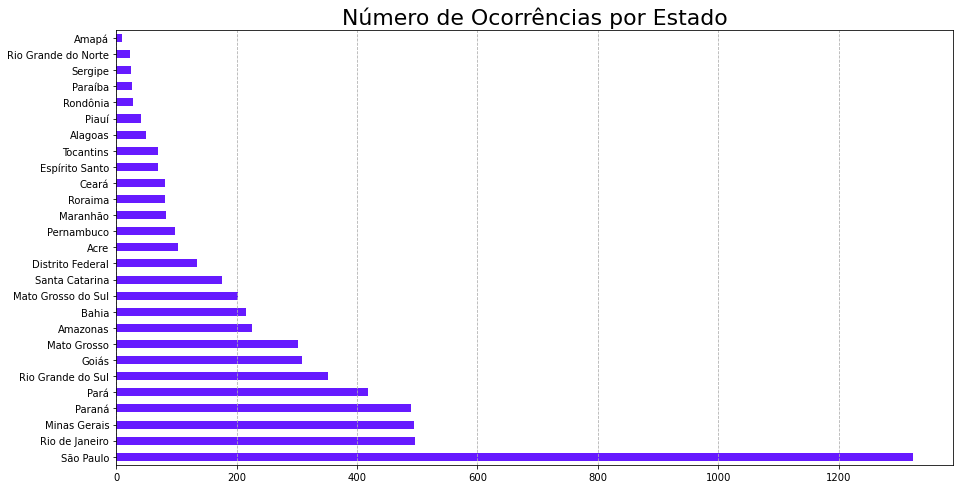

In [35]:
df_final['ocorrencia_estado'].value_counts().plot(kind='barh', color='#661aff', label='Inline label', figsize=(15,8))
df_final['ocorrencia_estado'].value_counts().to_csv('export/dashboard_ocorrencia_por_estado.csv', index=True)
plt.title('Número de Ocorrências por Estado', fontsize=22)
plt.grid(axis='x',ls='--')
plt.show()

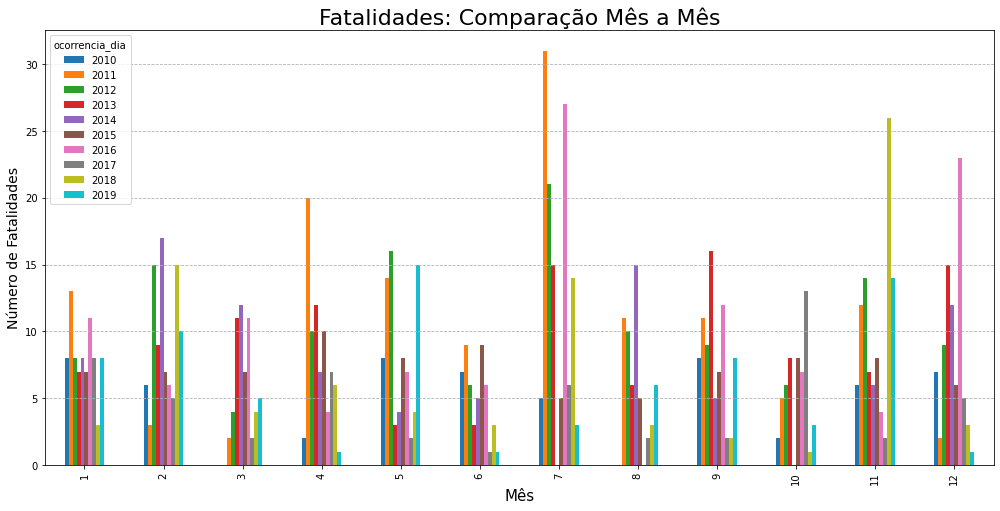

In [36]:
df_num_fatal.plot(kind='bar', figsize=(17, 8))
df_num_fatal.to_csv('export/dashboard_fatalitade_mes_a_mes.csv', index=True)
plt.title("Fatalidades: Comparação Mês a Mês", fontsize=22)
plt.xlabel("Mês", fontsize=15)
plt.ylabel("Número de Fatalidades", fontsize=14)
plt.grid(axis='y',ls='--')
plt.show()

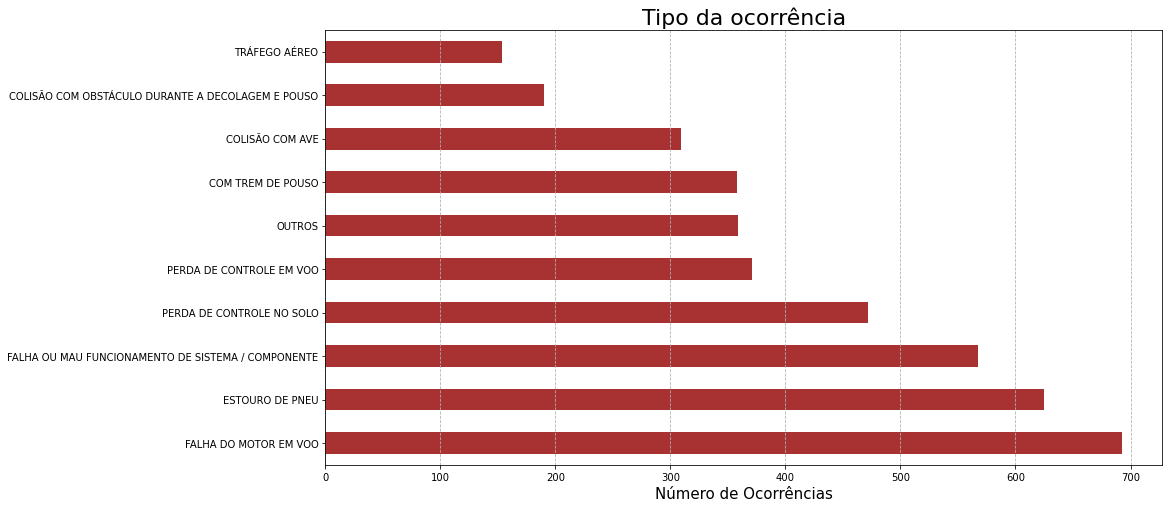

In [37]:
df_final['ocorrencia_tipo'].value_counts().head(10).plot(kind='barh', color='#a83232', label='Inline label', figsize=(15,8))
df_final['ocorrencia_tipo'].value_counts().head(10).to_csv('export/dashboard_tipo_ocorrencia.csv', index=True)
plt.title('Tipo da ocorrência', fontsize=22)
plt.xlabel('Número de Ocorrências', fontsize=15)
plt.grid(axis='x',ls='--')
plt.show()

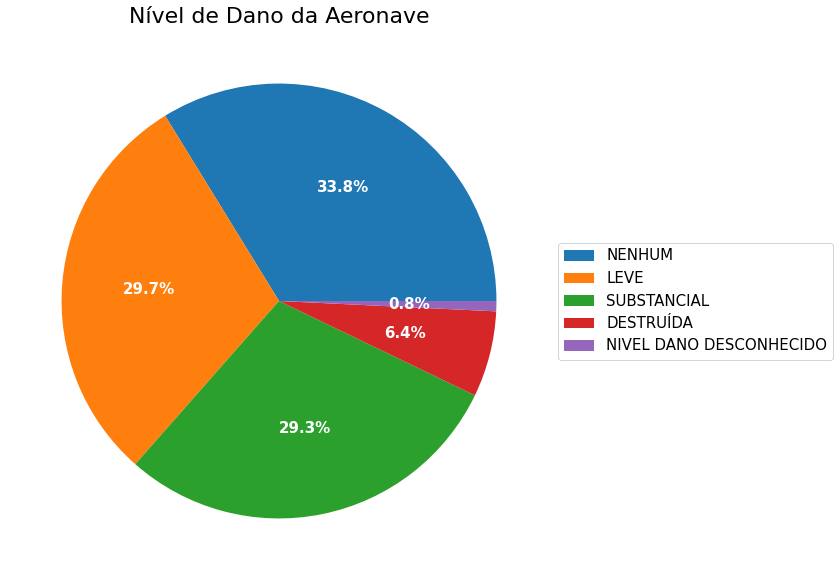

In [38]:
# Aeronave Nivel Dano
df_nivel_dano = df_final['aeronave_nivel_dano'].value_counts()
df_nivel_dano.to_csv('export/dashboard_nivel_dano_aeronave.csv', index=True)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
dados_dano = df_nivel_dano.values
legenda_dano = df_nivel_dano.index
wedges, texts, autotexts = ax.pie(dados_dano, autopct='%1.1f%%',textprops=dict(color="w"))
ax.legend(wedges, legenda_dano,
          loc="center left",
          fontsize=15,
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=15, weight="bold")
ax.set_title("Nível de Dano da Aeronave", fontsize=22)
plt.show()

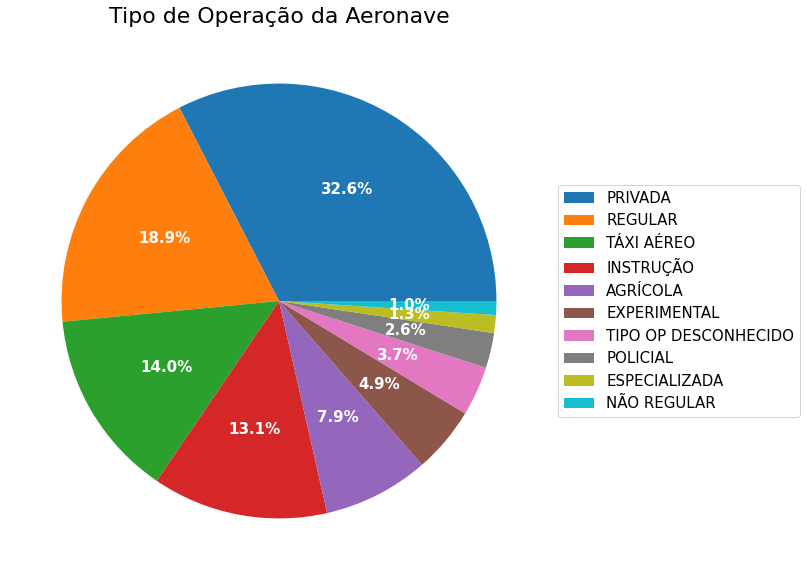

In [39]:
# Aeronave Tipo Operação
df_tipo_operacao = df_final['aeronave_tipo_operacao'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
dados_op = df_tipo_operacao.values
legenda_op = df_tipo_operacao.index
wedges, texts, autotexts = ax.pie(dados_op, autopct='%1.1f%%',textprops=dict(color="w"))
ax.legend(wedges, legenda_op,
          loc="center left",
          fontsize=15,
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")
ax.set_title("Tipo de Operação da Aeronave", fontsize=22)
plt.show()

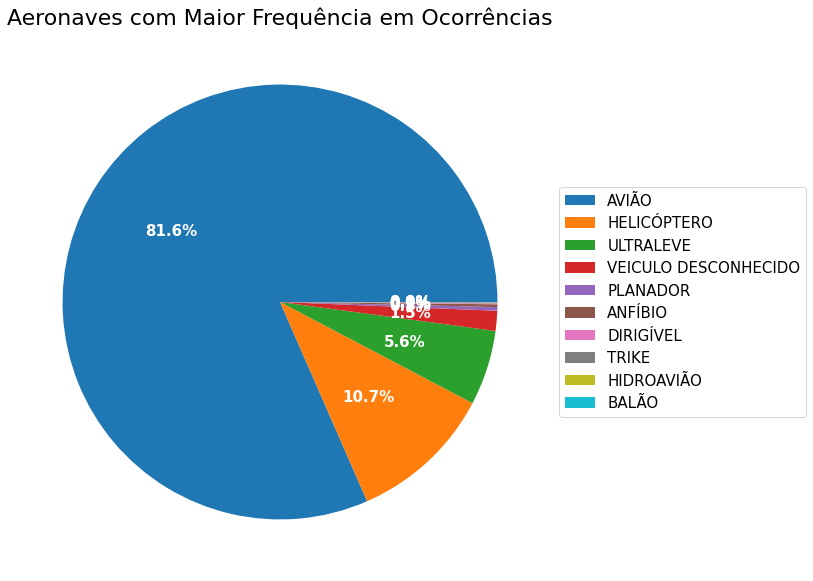

In [40]:
# Aeronave Tipo
df_aeronave_tipo_veiculo = df_final['aeronave_tipo_veiculo'].value_counts()
df_aeronave_tipo_veiculo.to_csv('export/dashboard_tipo_aeronave.csv', index=True)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
dados_op = df_aeronave_tipo_veiculo.values
legenda_op = df_aeronave_tipo_veiculo.index
wedges, texts, autotexts = ax.pie(dados_op, autopct='%1.1f%%', textprops=dict(color="w"))
ax.legend(wedges, legenda_op,
          loc="center left",
          fontsize=15,
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=15, weight="bold")
ax.set_title("Aeronaves com Maior Frequência em Ocorrências", fontsize=22)
plt.show()

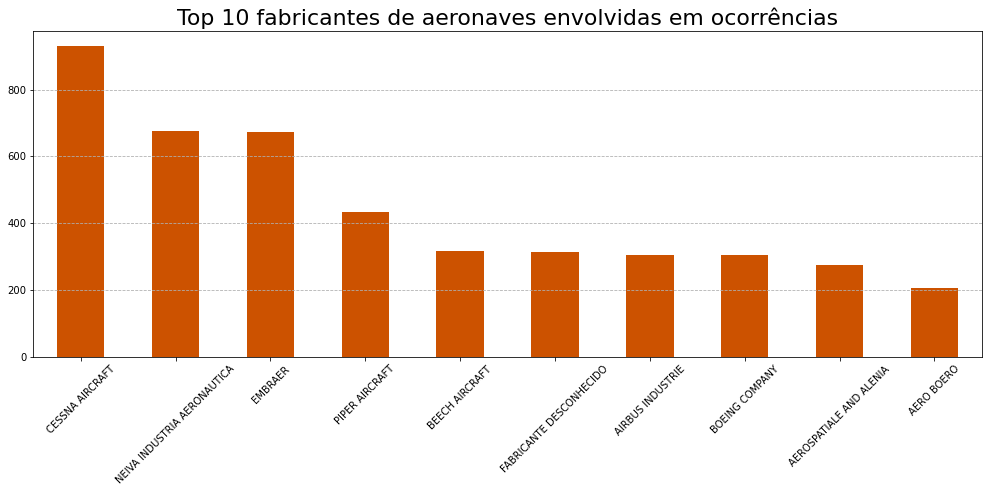

In [41]:
df_final['aeronave_fabricante'].value_counts().head(10).plot(kind='bar', color='#cc5200', label='Inline label', figsize=(17,6))
df_final['aeronave_fabricante'].value_counts().to_csv('export/dashboard_fabricantes.csv', index=True)
plt.title('Top 10 fabricantes de aeronaves envolvidas em ocorrências', fontsize=22)
plt.grid(axis='y',ls='--')
plt.xticks(rotation=45)
plt.show()

In [42]:
df_num_ocorre = pd.pivot_table(df_final, index=pd.DatetimeIndex(df_final['ocorrencia_dia']).month, columns=pd.DatetimeIndex(df_final['ocorrencia_dia']).year,
                    values='aeronave_fatalidades_total', aggfunc='count')

df_num_ocorre

ocorrencia_dia,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
ocorrencia_dia,,,,,,,,,,
1,54,66,54,61,75,50,49,34,46,54
2,37,56,63,64,63,46,40,43,38,43
3,49,50,74,68,56,45,53,42,50,55
4,56,70,49,69,54,47,49,34,45,46
5,55,54,59,63,53,51,18,47,38,49
6,53,44,68,61,53,32,22,41,36,24
7,54,65,53,58,50,47,37,41,62,47
8,60,56,65,45,58,35,23,34,33,51
9,74,45,72,54,54,42,42,42,36,59


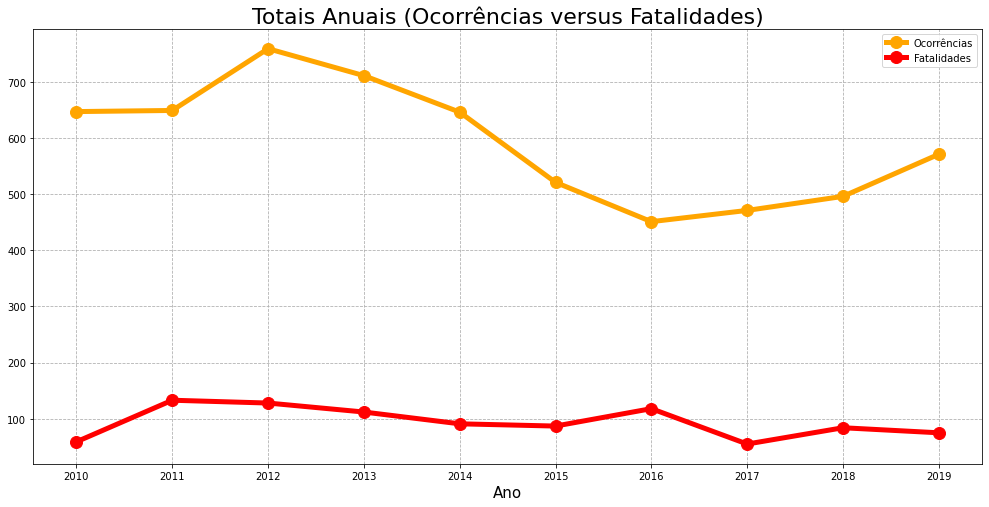

In [43]:
df_media_ocorr_anual = df_num_ocorre.sum()
df_media_fatal_anual = df_num_fatal.sum()
df_media_ocorr_anual.to_csv('export/dashboard_ocorrencia_anual.csv', index=True)
df_media_fatal_anual.to_csv('export/dashboard_fatalidade_anual.csv', index=True)

df_media_ocorr_anual.index = df_media_ocorr_anual.index.map(str)
df_media_fatal_anual.index = df_media_fatal_anual.index.map(str)

fig, ax = plt.subplots(figsize=(17,8))
ax.plot(df_media_ocorr_anual.index, df_media_ocorr_anual,color='orange', marker='o', linewidth=5, markersize=12)
ax.plot(df_media_fatal_anual.index, df_media_fatal_anual,color='red', marker='o', linewidth=5, markersize=12)

plt.title('Totais Anuais (Ocorrências versus Fatalidades)', fontsize=22)
plt.xlabel('Ano', fontsize=15)
ax.grid(ls='--')
plt.legend(['Ocorrências','Fatalidades'])
plt.show()

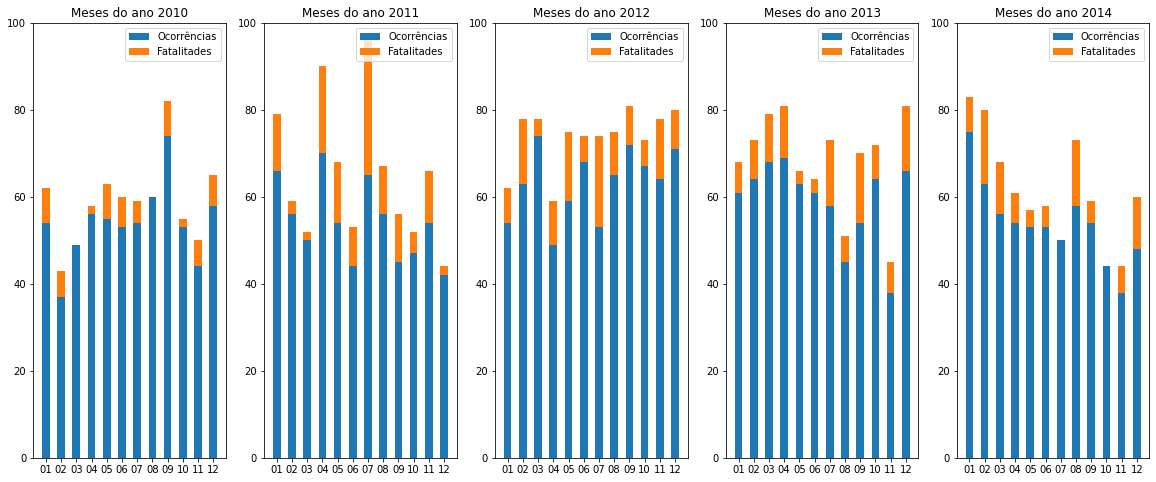

In [44]:
labels = ['01','02','03','04','05','06','07','08','09','10','11','12']
label_oco ='Ocorrências'
label_fat='Fatalitades'
width = 0.5

fig, ax = plt.subplots(figsize=(20,8))

ocorre2010 = df_num_ocorre[2010]
fatal2010 = df_num_fatal[2010]
plt.subplot(1,5,1)
plt.bar(labels, ocorre2010, width, label=label_oco)
plt.bar(labels, fatal2010, width, bottom=ocorre2010, label=label_fat)
plt.ylim(top=100)
plt.title('Meses do ano 2010')
plt.legend()

ocorre2011 = df_num_ocorre[2011]
fatal2011 = df_num_fatal[2011]
plt.subplot(1,5,2)
plt.bar(labels, ocorre2011, width, label=label_oco)
plt.bar(labels, fatal2011, width, bottom=ocorre2011, label=label_fat)
plt.ylim(top=100)
plt.title('Meses do ano 2011')
plt.legend()

ocorre2012 = df_num_ocorre[2012]
fatal2012 = df_num_fatal[2012]
plt.subplot(1,5,3)
plt.bar(labels, ocorre2012, width, label=label_oco)
plt.bar(labels, fatal2012, width, bottom=ocorre2012, label=label_fat)
plt.ylim(top=100)
plt.title('Meses do ano 2012')
plt.legend()

ocorre2013 = df_num_ocorre[2013]
fatal2013 = df_num_fatal[2013]
plt.subplot(1,5,4)
plt.bar(labels, ocorre2013, width, label=label_oco)
plt.bar(labels, fatal2013, width, bottom=ocorre2013, label=label_fat)
plt.ylim(top=100)
plt.title('Meses do ano 2013')
plt.legend()

ocorre2014 = df_num_ocorre[2014]
fatal2014 = df_num_fatal[2014]
plt.subplot(1,5,5)
plt.bar(labels, ocorre2014, width, label=label_oco)
plt.bar(labels, fatal2014, width, bottom=ocorre2014, label=label_fat)
plt.ylim(top=100)
plt.title('Meses do ano 2014')
plt.legend()

plt.show()

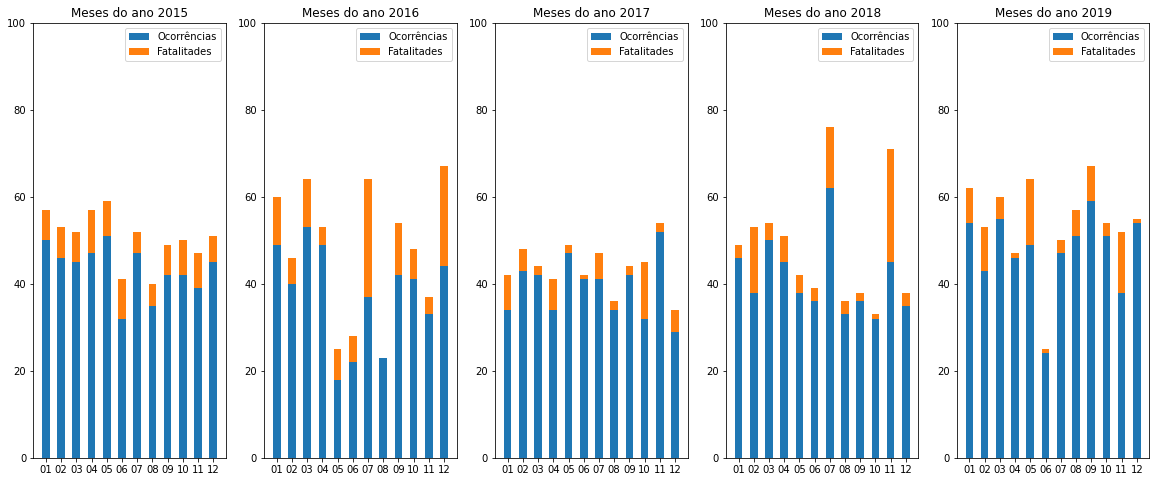

In [45]:
labels = ['01','02','03','04','05','06','07','08','09','10','11','12']
label_oco ='Ocorrências'
label_fat='Fatalitades'
width = 0.5

fig, ax = plt.subplots(figsize=(20,8))

ocorre2015 = df_num_ocorre[2015]
fatal2015 = df_num_fatal[2015]
plt.subplot(1,5,1)
plt.bar(labels, ocorre2015, width, label=label_oco)
plt.bar(labels, fatal2015, width, bottom=ocorre2015, label=label_fat)
plt.ylim(top=100)
plt.title('Meses do ano 2015')
plt.legend()

ocorre2016 = df_num_ocorre[2016]
fatal2016 = df_num_fatal[2016]
plt.subplot(1,5,2)
plt.bar(labels, ocorre2016, width, label=label_oco)
plt.bar(labels, fatal2016, width, bottom=ocorre2016, label=label_fat)
plt.ylim(top=100)
plt.title('Meses do ano 2016')
plt.legend()

ocorre2017 = df_num_ocorre[2017]
fatal2017 = df_num_fatal[2017]
plt.subplot(1,5,3)
plt.bar(labels, ocorre2017, width, label=label_oco)
plt.bar(labels, fatal2017, width, bottom=ocorre2017, label=label_fat)
plt.ylim(top=100)
plt.title('Meses do ano 2017')
plt.legend()

ocorre2018 = df_num_ocorre[2018]
fatal2018 = df_num_fatal[2018]
plt.subplot(1,5,4)
plt.bar(labels, ocorre2018, width, label=label_oco)
plt.bar(labels, fatal2018, width, bottom=ocorre2018, label=label_fat)
plt.ylim(top=100)
plt.title('Meses do ano 2018')
plt.legend()

ocorre2019 = df_num_ocorre[2019]
fatal2019 = df_num_fatal[2019]
plt.subplot(1,5,5)
plt.bar(labels, ocorre2019, width, label=label_oco)
plt.bar(labels, fatal2019, width, bottom=ocorre2019, label=label_fat)
plt.ylim(top=100)
plt.title('Meses do ano 2019')
plt.legend()

plt.show()

In [46]:
print('Maior número de fatalidades mensal em 2010:', fatal2010.max())
print('Maior número de fatalidades mensal em 2011:', fatal2011.max())
print('Maior número de fatalidades mensal em 2012:', fatal2012.max())
print('Maior número de fatalidades mensal em 2013:', fatal2013.max())
print('Maior número de fatalidades mensal em 2014:', fatal2014.max())
print('Maior número de fatalidades mensal em 2015:', fatal2015.max())
print('Maior número de fatalidades mensal em 2016:', fatal2016.max())
print('Maior número de fatalidades mensal em 2017:', fatal2017.max())
print('Maior número de fatalidades mensal em 2018:', fatal2018.max())
print('Maior número de fatalidades mensal em 2019:', fatal2019.max())

Maior número de fatalidades mensal em 2010: 8
Maior número de fatalidades mensal em 2011: 31
Maior número de fatalidades mensal em 2012: 21
Maior número de fatalidades mensal em 2013: 16
Maior número de fatalidades mensal em 2014: 17
Maior número de fatalidades mensal em 2015: 10
Maior número de fatalidades mensal em 2016: 27
Maior número de fatalidades mensal em 2017: 13
Maior número de fatalidades mensal em 2018: 26
Maior número de fatalidades mensal em 2019: 15


### Analisando a série temporal

Na estatística descritiva, uma série temporal é definida como um conjunto de variáveis aleatórias ordenadas em relação ao tempo. As séries temporais são podem ser estudadas para interpretar um fenômeno, identificando os componentes de uma tendência, ciclicidade, sazonalidade.

In [47]:
# Cria um objeto time series agrupando o número diário de ocorrências
serie_temporal = df_final['ocorrencia_dia'].value_counts()
serie_temporal = serie_temporal.sort_index()
# Cria um objeto rolling de janela igual a 30 dias:
serie_media_movel = serie_temporal.rolling(window=30)
# Calcula a média da janela:
serie_media_movel = serie_media_movel.mean()
serie_media_movel = serie_media_movel.sort_index()
serie_temporal.head(10)

2010-01-03    5
2010-01-04    1
2010-01-05    1
2010-01-06    1
2010-01-07    1
2010-01-09    1
2010-01-10    6
2010-01-11    1
2010-01-12    1
2010-01-15    4
Name: ocorrencia_dia, dtype: int64

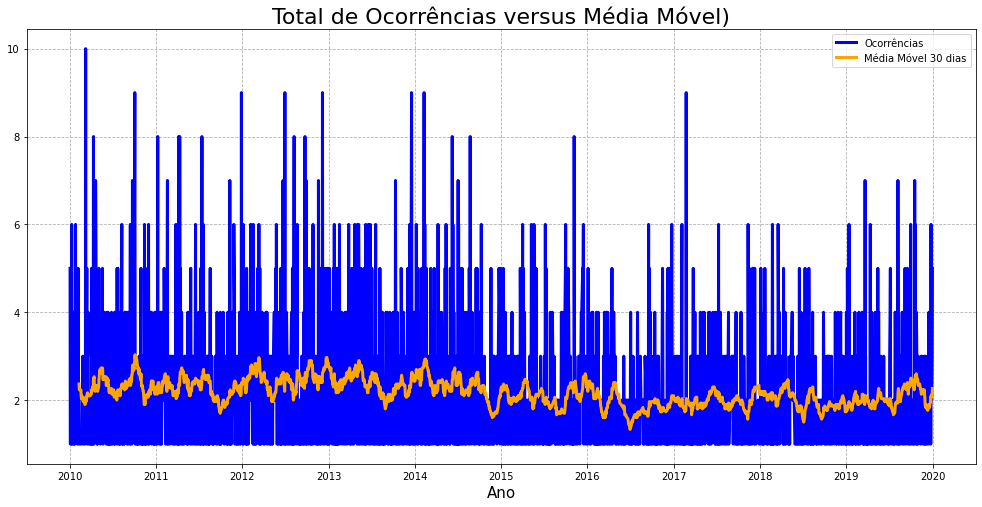

In [48]:
fig, ax = plt.subplots(figsize=(17,8))
ax.plot(serie_temporal.index, serie_temporal,color='blue', linewidth=3, markersize=12)
ax.plot(serie_media_movel.index, serie_media_movel,color='orange', linewidth=3, markersize=12)

plt.title('Total de Ocorrências versus Média Móvel)', fontsize=22)
plt.xlabel('Ano', fontsize=15)
ax.grid(ls='--')
plt.legend(['Ocorrências','Média Móvel 30 dias'])
plt.show()

Analisando visualmente o gráfico acima, podemos perceber que não trata-se de uma série temporal com tendência...mas para confirmar este pressuposto vamos testar estatisticamente a série temporal..

### Teste de Dickey-Fuller aumentado (ADF)

Em estatística, o Teste de Dickey-Fuller aumentado ou Teste ADF (do acrônimo em inglês Augmented Dickey-Fuller) é um teste de raiz unitária em séries temporais. 

A estatística ADF, usada no teste, é um número negativo, e quanto mais negativo, mais indicativo o teste se torna de rejeitar a hipótese nula de que existe raiz unitária na série, em outras palavras, de que a série temporal não é estacionária.

In [49]:
from statsmodels.tsa.stattools import adfuller

teste_adf = adfuller(serie_temporal)

print('Estatística ADF: %f' % teste_adf[0])
print('Valor p: %f' % teste_adf[1])
print('Valores Críticos:')
for key, value in teste_adf[4].items():
    print('\t%s: %.3f' % (key, value))


Estatística ADF: -28.153375
Valor p: 0.000000
Valores Críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567


#### Estados com maior número de ocorrências

## 5 - Criação de Modelos de Machine Learning

In [50]:
df_ml = df_final.drop(df_final.columns[[0,33]], axis=1)
df_ml.head(10)

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_cidade,coordenadas_cidade,longitude_cidade,latitude_cidade,altitude_cidade,ocorrencia_uf,ocorrencia_estado,regiao,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,ocorrencia_fatalidade
0,ACIDENTE,PANE SECA,COMBUSTÍVEL | PANE SECA,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2010-02-07,1,NÃO,PTNQX,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,4.0,1979,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,NÃO
1,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2010-04-15,1,NÃO,PTGRY,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1978,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,AGRÍCOLA,SUBSTANCIAL,NÃO
2,ACIDENTE,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2010-05-26,1,NÃO,PTGUF,OPERADOR DESCONHECIDO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1.0,1980,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,OUTRA FASE,AGRÍCOLA,DESTRUÍDA,SIM
3,ACIDENTE,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2011-03-01,1,NÃO,PTUXX,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2009,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,SUBSTANCIAL,NÃO
4,ACIDENTE,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2011-03-05,1,NÃO,PTUVE,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1.0,2008,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,NÃO
5,ACIDENTE,POUSO EM LOCAL NÃO PREVISTO,OUTROS | POUSO EM LOCAL NÃO PREVISTO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2011-05-24,1,NÃO,PTRGG,OPERADOR DESCONHECIDO,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,6.0,1981,BRASIL,AVIÃO,PARTICULAR,SANTA GENOVEVA/GOIÂNIA,ORIÇANGA DE ABREU,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,NÃO
6,ACIDENTE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2012-02-05,1,NÃO,PTUME,PARTICULAR,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1.0,2000,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,NÃO
7,INCIDENTE GRAVE,COLISÃO COM FAUNA,COLISÃO COM FAUNA,CORRENTINA,"-44.641086701211,-13.3417718207863,574.456246",-44.641086701211,-13.3417718207863,574.456246,BA,Bahia,Localizado na Região Nordeste,2014-04-30,1,NÃO,PTWPZ,PARTICULAR,AVIÃO,BEECH AIRCRAFT,58,BE58,PISTÃO,BIMOTOR,6.0,1994,BRASIL,AVIÃO,PARTICULAR,ABA,CORRENTINA,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,NÃO
8,INCIDENTE GRAVE,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROL

In [51]:
from sklearn import preprocessing
import datetime as dt

le_ocorrencia_classificacao = preprocessing.LabelEncoder()
le_ocorrencia_classificacao.fit(df_ml['ocorrencia_classificacao'].unique().tolist())
df_ml.iloc[:,0] = le_ocorrencia_classificacao.transform(df_ml.iloc[:,0])

le_ocorrencia_tipo = preprocessing.LabelEncoder()
le_ocorrencia_tipo.fit(df_ml['ocorrencia_tipo'].unique().tolist())
df_ml.iloc[:,1] = le_ocorrencia_tipo.transform(df_ml.iloc[:,1])

le_ocorrencia_tipo_categoria = preprocessing.LabelEncoder()
le_ocorrencia_tipo_categoria.fit(df_ml['ocorrencia_tipo_categoria'].unique().tolist())
df_ml.iloc[:,2] = le_ocorrencia_tipo_categoria.transform(df_ml.iloc[:,2])

le_ocorrencia_cidade = preprocessing.LabelEncoder()
le_ocorrencia_cidade.fit(df_ml['ocorrencia_cidade'].unique().tolist())
df_ml.iloc[:,3] = le_ocorrencia_cidade.transform(df_ml.iloc[:,3])

le_coordenadas_cidade = preprocessing.LabelEncoder()
le_coordenadas_cidade.fit(df_ml['coordenadas_cidade'].unique().tolist())
df_ml.iloc[:,4] = le_coordenadas_cidade.transform(df_ml.iloc[:,4])

le_longitude_cidade = preprocessing.LabelEncoder()
le_longitude_cidade.fit(df_ml['longitude_cidade'].unique().tolist())
df_ml.iloc[:,5] = le_longitude_cidade.transform(df_ml.iloc[:,5])

le_latitude_cidade = preprocessing.LabelEncoder()
le_latitude_cidade.fit(df_ml['latitude_cidade'].unique().tolist())
df_ml.iloc[:,6] = le_latitude_cidade.transform(df_ml.iloc[:,6])

le_altitude_cidade = preprocessing.LabelEncoder()
le_altitude_cidade.fit(df_ml['altitude_cidade'].unique().tolist())
df_ml.iloc[:,7] = le_altitude_cidade.transform(df_ml.iloc[:,7])

le_ocorrencia_uf = preprocessing.LabelEncoder()
le_ocorrencia_uf.fit(df_ml['ocorrencia_uf'].unique().tolist())
df_ml.iloc[:,8] = le_ocorrencia_uf.transform(df_ml.iloc[:,8])

le_ocorrencia_estado = preprocessing.LabelEncoder()
le_ocorrencia_estado.fit(df_ml['ocorrencia_estado'].unique().tolist())
df_ml.iloc[:,9] = le_ocorrencia_estado.transform(df_ml.iloc[:,9])

le_regiao = preprocessing.LabelEncoder()
le_regiao.fit(df_ml['regiao'].unique().tolist())
df_ml.iloc[:,10] = le_regiao.transform(df_ml.iloc[:,10])

le_ocorrencia_dia = preprocessing.LabelEncoder()
df_ml['ocorrencia_dia'] = df_ml['ocorrencia_dia'].map(dt.datetime.toordinal)
le_ocorrencia_dia.fit(df_ml['ocorrencia_dia'].unique().tolist())
df_ml.iloc[:,11] = le_ocorrencia_dia.transform(df_ml.iloc[:,11])

le_ocorrencia_saida_pista = preprocessing.LabelEncoder()
le_ocorrencia_saida_pista.fit(df_ml['ocorrencia_saida_pista'].unique().tolist())
df_ml.iloc[:,13] = le_ocorrencia_saida_pista.transform(df_ml.iloc[:,13])

le_aeronave_matricula = preprocessing.LabelEncoder()
le_aeronave_matricula.fit(df_ml['aeronave_matricula'].unique().tolist())
df_ml.iloc[:,14] = le_aeronave_matricula.transform(df_ml.iloc[:,14])

le_aeronave_operador_categoria = preprocessing.LabelEncoder()
le_aeronave_operador_categoria.fit(df_ml['aeronave_operador_categoria'].unique().tolist())
df_ml.iloc[:,15] = le_aeronave_operador_categoria.transform(df_ml.iloc[:,15])

le_aeronave_tipo_veiculo = preprocessing.LabelEncoder()
le_aeronave_tipo_veiculo.fit(df_ml['aeronave_tipo_veiculo'].unique().tolist())
df_ml.iloc[:,16] = le_aeronave_tipo_veiculo.transform(df_ml.iloc[:,16])

le_aeronave_fabricante = preprocessing.LabelEncoder()
le_aeronave_fabricante.fit(df_ml['aeronave_fabricante'].unique().tolist())
df_ml.iloc[:,17] = le_aeronave_fabricante.transform(df_ml.iloc[:,17])

le_aeronave_modelo = preprocessing.LabelEncoder()
le_aeronave_modelo.fit(df_ml['aeronave_modelo'].unique().tolist())
df_ml.iloc[:,18] = le_aeronave_modelo.transform(df_ml.iloc[:,18])

le_aeronave_tipo_icao = preprocessing.LabelEncoder()
le_aeronave_tipo_icao.fit(df_ml['aeronave_tipo_icao'].unique().tolist())
df_ml.iloc[:,19] = le_aeronave_tipo_icao.transform(df_ml.iloc[:,19])

le_aeronave_motor_tipo = preprocessing.LabelEncoder()
le_aeronave_motor_tipo.fit(df_ml['aeronave_motor_tipo'].unique().tolist())
df_ml.iloc[:,20] = le_aeronave_motor_tipo.transform(df_ml.iloc[:,20])

le_aeronave_motor_quantidade = preprocessing.LabelEncoder()
le_aeronave_motor_quantidade.fit(df_ml['aeronave_motor_quantidade'].unique().tolist())
df_ml.iloc[:,21] = le_aeronave_motor_quantidade.transform(df_ml.iloc[:,21])

le_aeronave_pais_fabricante = preprocessing.LabelEncoder()
le_aeronave_pais_fabricante.fit(df_ml['aeronave_pais_fabricante'].unique().tolist())
df_ml.iloc[:,24] = le_aeronave_pais_fabricante.transform(df_ml.iloc[:,24])

le_aeronave_registro_categoria = preprocessing.LabelEncoder()
le_aeronave_registro_categoria.fit(df_ml['aeronave_registro_categoria'].unique().tolist())
df_ml.iloc[:,25] = le_aeronave_registro_categoria.transform(df_ml.iloc[:,25])

le_aeronave_registro_segmento = preprocessing.LabelEncoder()
le_aeronave_registro_segmento.fit(df_ml['aeronave_registro_segmento'].unique().tolist())
df_ml.iloc[:,26] = le_aeronave_registro_segmento.transform(df_ml.iloc[:,26])

le_aeronave_voo_origem = preprocessing.LabelEncoder()
le_aeronave_voo_origem.fit(df_ml['aeronave_voo_origem'].unique().tolist())
df_ml.iloc[:,27] = le_aeronave_voo_origem.transform(df_ml.iloc[:,27])

le_aeronave_voo_destino = preprocessing.LabelEncoder()
le_aeronave_voo_destino.fit(df_ml['aeronave_voo_destino'].unique().tolist())
df_ml.iloc[:,28] = le_aeronave_voo_destino.transform(df_ml.iloc[:,28])

le_aeronave_fase_operacao = preprocessing.LabelEncoder()
le_aeronave_fase_operacao.fit(df_ml['aeronave_fase_operacao'].unique().tolist())
df_ml.iloc[:,29] = le_aeronave_fase_operacao.transform(df_ml.iloc[:,29])

le_aeronave_tipo_operacao = preprocessing.LabelEncoder()
le_aeronave_tipo_operacao.fit(df_ml['aeronave_tipo_operacao'].unique().tolist())
df_ml.iloc[:,30] = le_aeronave_tipo_operacao.transform(df_ml.iloc[:,30])

le_aeronave_nivel_dano = preprocessing.LabelEncoder()
le_aeronave_nivel_dano.fit(df_ml['aeronave_nivel_dano'].unique().tolist())
df_ml.iloc[:,31] = le_aeronave_nivel_dano.transform(df_ml.iloc[:,31])

le_ocorrencia_fatalidade = preprocessing.LabelEncoder()
le_ocorrencia_fatalidade.fit(df_ml['ocorrencia_fatalidade'].unique().tolist())
df_ml.iloc[:,32] = le_ocorrencia_fatalidade.transform(df_ml.iloc[:,32])

df_ml.head(10)

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_cidade,coordenadas_cidade,longitude_cidade,latitude_cidade,altitude_cidade,ocorrencia_uf,ocorrencia_estado,regiao,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,ocorrencia_fatalidade
0,0,54,9,281,294,294,112,731,4,4,1,26,1,0,2842,8,1,154,428,180,1,1,4.0,1979,3,1,9,92,163,7,6,4,0
1,0,59,67,281,294,294,112,731,4,4,1,77,1,0,2388,8,1,154,417,154,1,1,1.0,1978,3,1,2,304,298,5,0,4,0
2,0,58,66,281,294,294,112,731,4,4,1,106,1,0,2399,8,1,154,417,154,1,1,1.0,1980,3,1,2,304,298,21,0,0,1
3,0,23,20,281,294,294,112,731,4,4,1,331,1,0,3247,8,1,66,420,154,1,1,1.0,2009,3,1,9,304,298,7,6,4,0
4,0,58,66,281,294,294,112,731,4,4,1,335,1,0,3241,8,1,66,420,154,1,1,1.0,2008,3,1,2,304,298,13,0,4,0
5,0,64,61,281,294,294,112,731,4,4,1,398,1,0,3004,8,1,66,439,195,1,0,6.0,1981,3,1,9,534,447,5,6,4,0
6,0,59,67,281,294,294,112,731,4,4,1,590,1,0,3183,9,1,154,418,154,1,1,1.0,2000,3,1,9,304,298,24,0,4,0
7,2,8,3,281,294,294,112,731,4,4,1,1265,1,0,3456,9,1,31,123,71,1,0,6.0,1994,3,1,9,1,163,5,6,4,0
8,2,59,67,281,294,294,112,731,4,4,1,2153,1,1,560,8,1,12,292,30,5,1,1.0,2012,3,1,2,304,298,5,0,1,0
9,1,9,4,168,105,105,115,140,4,4,1,21,1,0,2245,11,1,66,442,193,1,0,10.0,1976,3,1,12,304,298,7,9,1,0


In [52]:
# Substitui os registros que possuem o ano de fabricação desconhecido pelo dado numérico 9999
df_ml = df_ml.replace('ANO FAB DESCONHECIDO', 9999)

In [53]:
df_ml.dtypes

ocorrencia_classificacao         int64
ocorrencia_tipo                  int64
ocorrencia_tipo_categoria        int64
ocorrencia_cidade                int64
coordenadas_cidade               int64
longitude_cidade                 int64
latitude_cidade                  int64
altitude_cidade                  int64
ocorrencia_uf                    int64
ocorrencia_estado                int64
regiao                           int64
ocorrencia_dia                   int64
total_aeronaves_envolvidas       int64
ocorrencia_saida_pista           int64
aeronave_matricula               int64
aeronave_operador_categoria      int64
aeronave_tipo_veiculo            int64
aeronave_fabricante              int64
aeronave_modelo                  int64
aeronave_tipo_icao               int64
aeronave_motor_tipo              int64
aeronave_motor_quantidade        int64
aeronave_assentos              float64
aeronave_ano_fabricacao        float64
aeronave_pais_fabricante         int64
aeronave_registro_categor

In [54]:
X = df_ml.iloc[:,0:-1]
y = df_ml['ocorrencia_fatalidade']

In [55]:
X.head(10)

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_cidade,coordenadas_cidade,longitude_cidade,latitude_cidade,altitude_cidade,ocorrencia_uf,ocorrencia_estado,regiao,ocorrencia_dia,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano
0,0,54,9,281,294,294,112,731,4,4,1,26,1,0,2842,8,1,154,428,180,1,1,4.0,1979.0,3,1,9,92,163,7,6,4
1,0,59,67,281,294,294,112,731,4,4,1,77,1,0,2388,8,1,154,417,154,1,1,1.0,1978.0,3,1,2,304,298,5,0,4
2,0,58,66,281,294,294,112,731,4,4,1,106,1,0,2399,8,1,154,417,154,1,1,1.0,1980.0,3,1,2,304,298,21,0,0
3,0,23,20,281,294,294,112,731,4,4,1,331,1,0,3247,8,1,66,420,154,1,1,1.0,2009.0,3,1,9,304,298,7,6,4
4,0,58,66,281,294,294,112,731,4,4,1,335,1,0,3241,8,1,66,420,154,1,1,1.0,2008.0,3,1,2,304,298,13,0,4
5,0,64,61,281,294,294,112,731,4,4,1,398,1,0,3004,8,1,66,439,195,1,0,6.0,1981.0,3,1,9,534,447,5,6,4
6,0,59,67,281,294,294,112,731,4,4,1,590,1,0,3183,9,1,154,418,154,1,1,1.0,2000.0,3,1,9,304,298,24,0,4
7,2,8,3,281,294,294,112,731,4,4,1,1265,1,0,3456,9,1,31,123,71,1,0,6.0,1994.0,3,1,9,1,163,5,6,4
8,2,59,67,281,294,294,112,731,4,4,1,2153,1,1,560,8,1,12,292,30,5,1,1.0,2012.0,3,1,2,304,298,5,0,1
9,1,9,4,168,105,105,115,140,4,4,1,21,1,0,2245,11,1,66,442,193,1,0,10.0,1976.0,3,1,12,304,298,7,9,1


In [56]:
y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: ocorrencia_fatalidade, dtype: int64

Pode-se observar que até o momento temos muitas colunas (features) a serem usadas como base para o modelo de previsão, porém será que todas elas são realmente essenciais para o modelo ?

É neste momento que entra em cena a etapa de feature selection, pois ela irá ajudar a definir quais são as features que apresentam melhor correlação para a feature a ser predita, além de reduzir o overfitting, aumentar a acurácia do modelo e reduzir o tempo de treinamento.

Para isso, podemos utilizar o objeto "feature_selection" da biblioteca sklearn e definir em "k" as 4 melhores features para prever a coluna "ocorrencia_fatalidade".

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif = SelectKBest(score_func=f_classif, k=5)
fit = f_classif.fit(X,y)
features = fit.transform(X)

cols = fit.get_support(indices=True)
X = df_ml.iloc[:,cols]
X.head(10)

,ocorrencia_classificacao,ocorrencia_tipo_categoria,aeronave_tipo_veiculo,aeronave_registro_categoria,aeronave_nivel_dano
0,0,9,1,1,4
1,0,67,1,1,4
2,0,66,1,1,0
3,0,20,1,1,4
4,0,66,1,1,4
5,0,61,1,1,4
6,0,67,1,1,4
7,2,3,1,1,4
8,2,67,1,1,1
9,1,4,1,1,1


### Árvore de Decisão (Decision Tree)

In [58]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
!pip install pydotplus
import pydotplus

In [59]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [60]:
fatalidadeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
fatalidadeTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [61]:
predTree = fatalidadeTree.predict(X_testset)

In [96]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Métricas do modelo de Árvore de Decisão:\n")
print(metrics.classification_report(y_testset, predTree))

Métricas do modelo de Árvore de Decisão:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1639
           1       0.76      0.62      0.68       138

    accuracy                           0.95      1777
   macro avg       0.86      0.80      0.83      1777
weighted avg       0.95      0.95      0.95      1777



In [97]:
text_representation = tree.export_text(fatalidadeTree)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_1 <= 52.50
|   |   |--- feature_1 <= 6.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  6.00
|   |   |   |--- class: 1
|   |--- feature_1 >  52.50
|   |   |--- feature_1 <= 60.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  60.50
|   |   |   |--- class: 1
|--- feature_4 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_3 <= 5.00
|   |   |   |--- class: 0
|   |   |--- feature_3 >  5.00
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 0



In [98]:
print(y_testset.head(10))

2839    0
4235    1
924     0
1404    0
3960    0
1794    0
2042    0
1529    0
1831    0
1460    0
Name: ocorrencia_fatalidade, dtype: int64


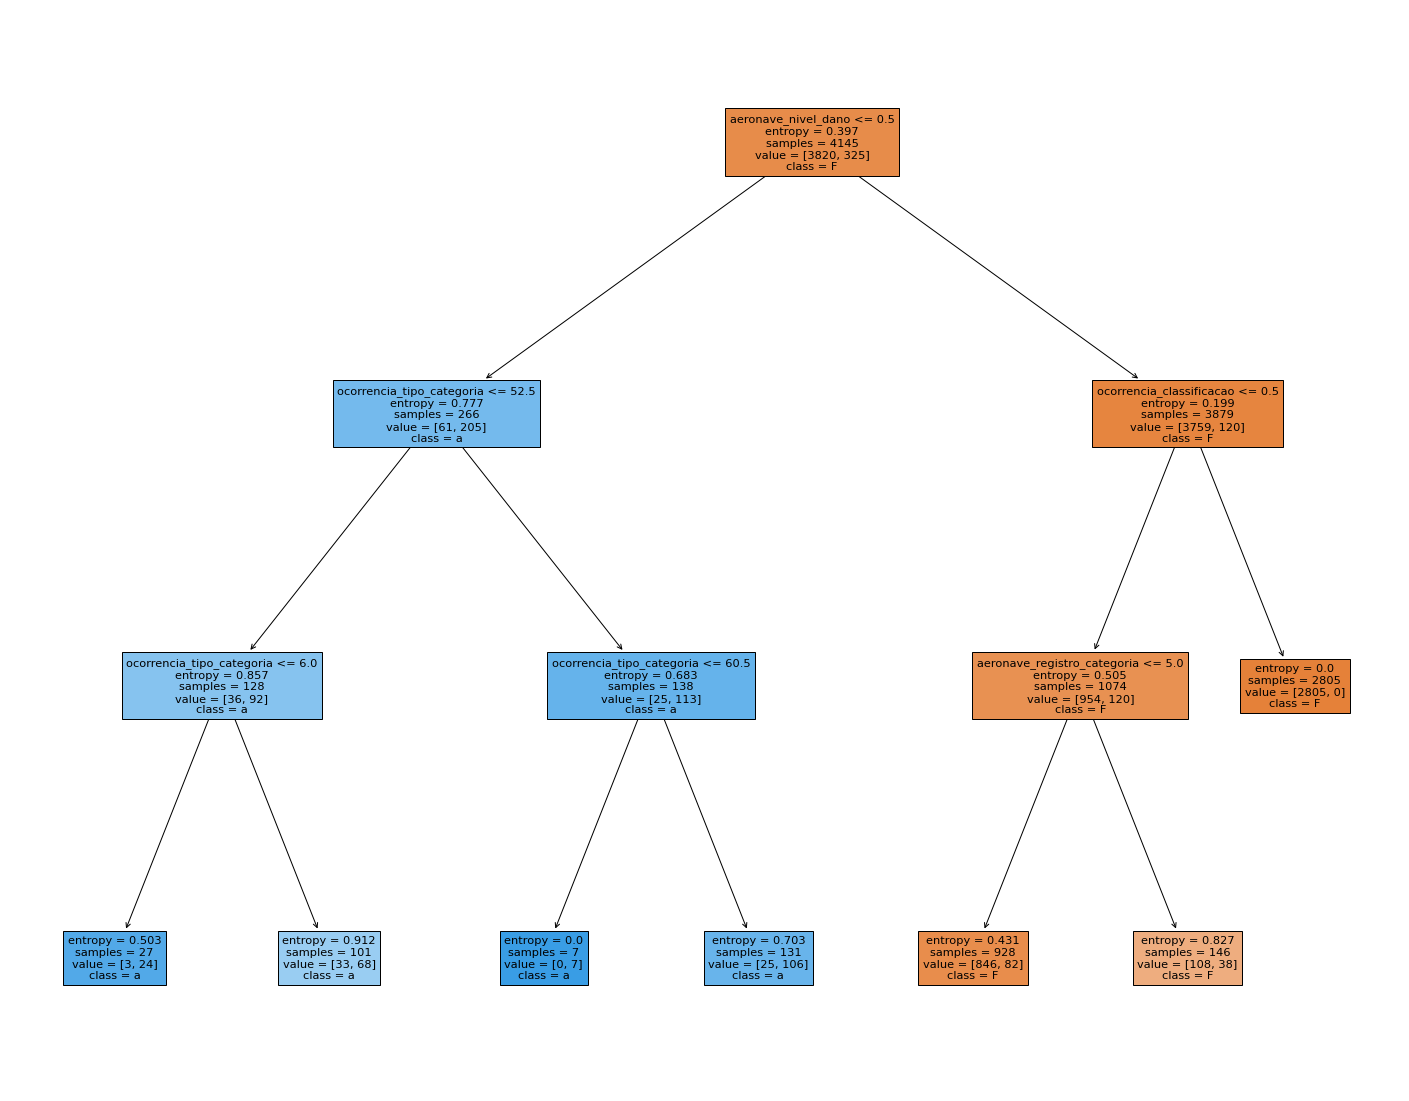

In [99]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(fatalidadeTree, 
                   feature_names=X_testset.columns.values,  
                   class_names='Fatalidade',
                   filled=True)


### Máquina de Vetores de Suporte (Support Vector Machine – SVM)

In [100]:
from sklearn import svm
from sklearn import metrics

#Cria um svm Classifier
clf = svm.SVC(kernel='linear')

In [101]:
#Treina o modelo
clf.fit(X_trainset, y_trainset)

#Preve a resposta do dataset
y_pred = clf.predict(X_testset)

print("Métricas do modelo de Máquina de Vetores de Suporte - SVM: \n")
print(metrics.classification_report(y_testset, y_pred))

Métricas do modelo de Máquina de Vetores de Suporte - SVM: 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1639
           1       0.67      0.63      0.65       138

    accuracy                           0.95      1777
   macro avg       0.82      0.80      0.81      1777
weighted avg       0.95      0.95      0.95      1777

